In [69]:
import logging
import matplotlib.pyplot as plt

from analyzer import GaiaAnalyzer
from analyzer import MISTFitter, BinaryMixtureFitter
from downloader import LightCurveExtractor

%load_ext autoreload
%autoreload 2

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
# some statements to make the figures look nicer 
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'axes.linewidth' : 1,
                     'ytick.major.width' : 1,
                     'ytick.minor.width' : 1,
                     'xtick.major.width' : 1,
                     'xtick.minor.width' : 1,
                     'xtick.labelsize': 10, 
                     'ytick.labelsize': 10,
                     'axes.labelsize': 12,
                    
                     'font.family': 'Serif',
                     'figure.figsize': (10, 6)
                    })

In [123]:
gaia_analyzer = GaiaAnalyzer(filename='data/gaia.csv')
gaia_analyzer.get_data()

df = gaia_analyzer.get_data().copy()
df.head()

source_id         ra        dec   parallax  parallax_unc  \
0   3763976194792448  45.276791   5.006404   7.954515      0.019097   
1  11352324413414016  52.860503   7.796339   8.422533      0.035354   
2  19817739313090688  39.568739   7.965070  12.499952      0.160662   
3  43733079289895424  56.558523  17.154376  18.583617      0.023517   
4  46438771249859840  61.218048  17.464281   7.537225      0.097988   

        pmra  pmra_error       pmdec  pmdec_error      G_mag  ...  logg  \
0  24.526128    0.023404  -45.727224     0.017959   9.279200  ...  3.95   
1  24.168420    0.050407  -50.147355     0.035200  13.830488  ...   NaN   
2  43.608250    0.172182  -71.069385     0.178885  18.442486  ...   NaN   
3  49.660663    0.026018 -111.754468     0.019403  12.016204  ...   NaN   
4  18.629909    0.107982  -46.349503     0.063953  13.154690  ...  5.04   

   logg_gspspec_lower  logg_gspspec_upper  phot_bp_rp  BP_mag_unc  RP_mag_unc  \
0                3.78                4.06    0.720543    0.000650    0.000533   
1                 NaN                 NaN    2.155826    0.001755    0.000591   
2                 NaN                 NaN    0.715567    0.035904    0.030820   
3                 NaN                 NaN    2.040105    0.006811    0.003703   
4                4.60                5.20    2.051896    0.002722    0.001453   

   G_mag_unc   teff_unc  logg_unc  distance_unc  
0   0.000192   2.645996      0.14      0.308952  
1   0.000444   4.344116       NaN      3.102100  
2   0.002122        NaN       NaN           NaN  
3   0.001573        NaN       NaN           NaN  
4   0.000786  11.991455      0.30      1.777851  

[5 rows x 37 columns]

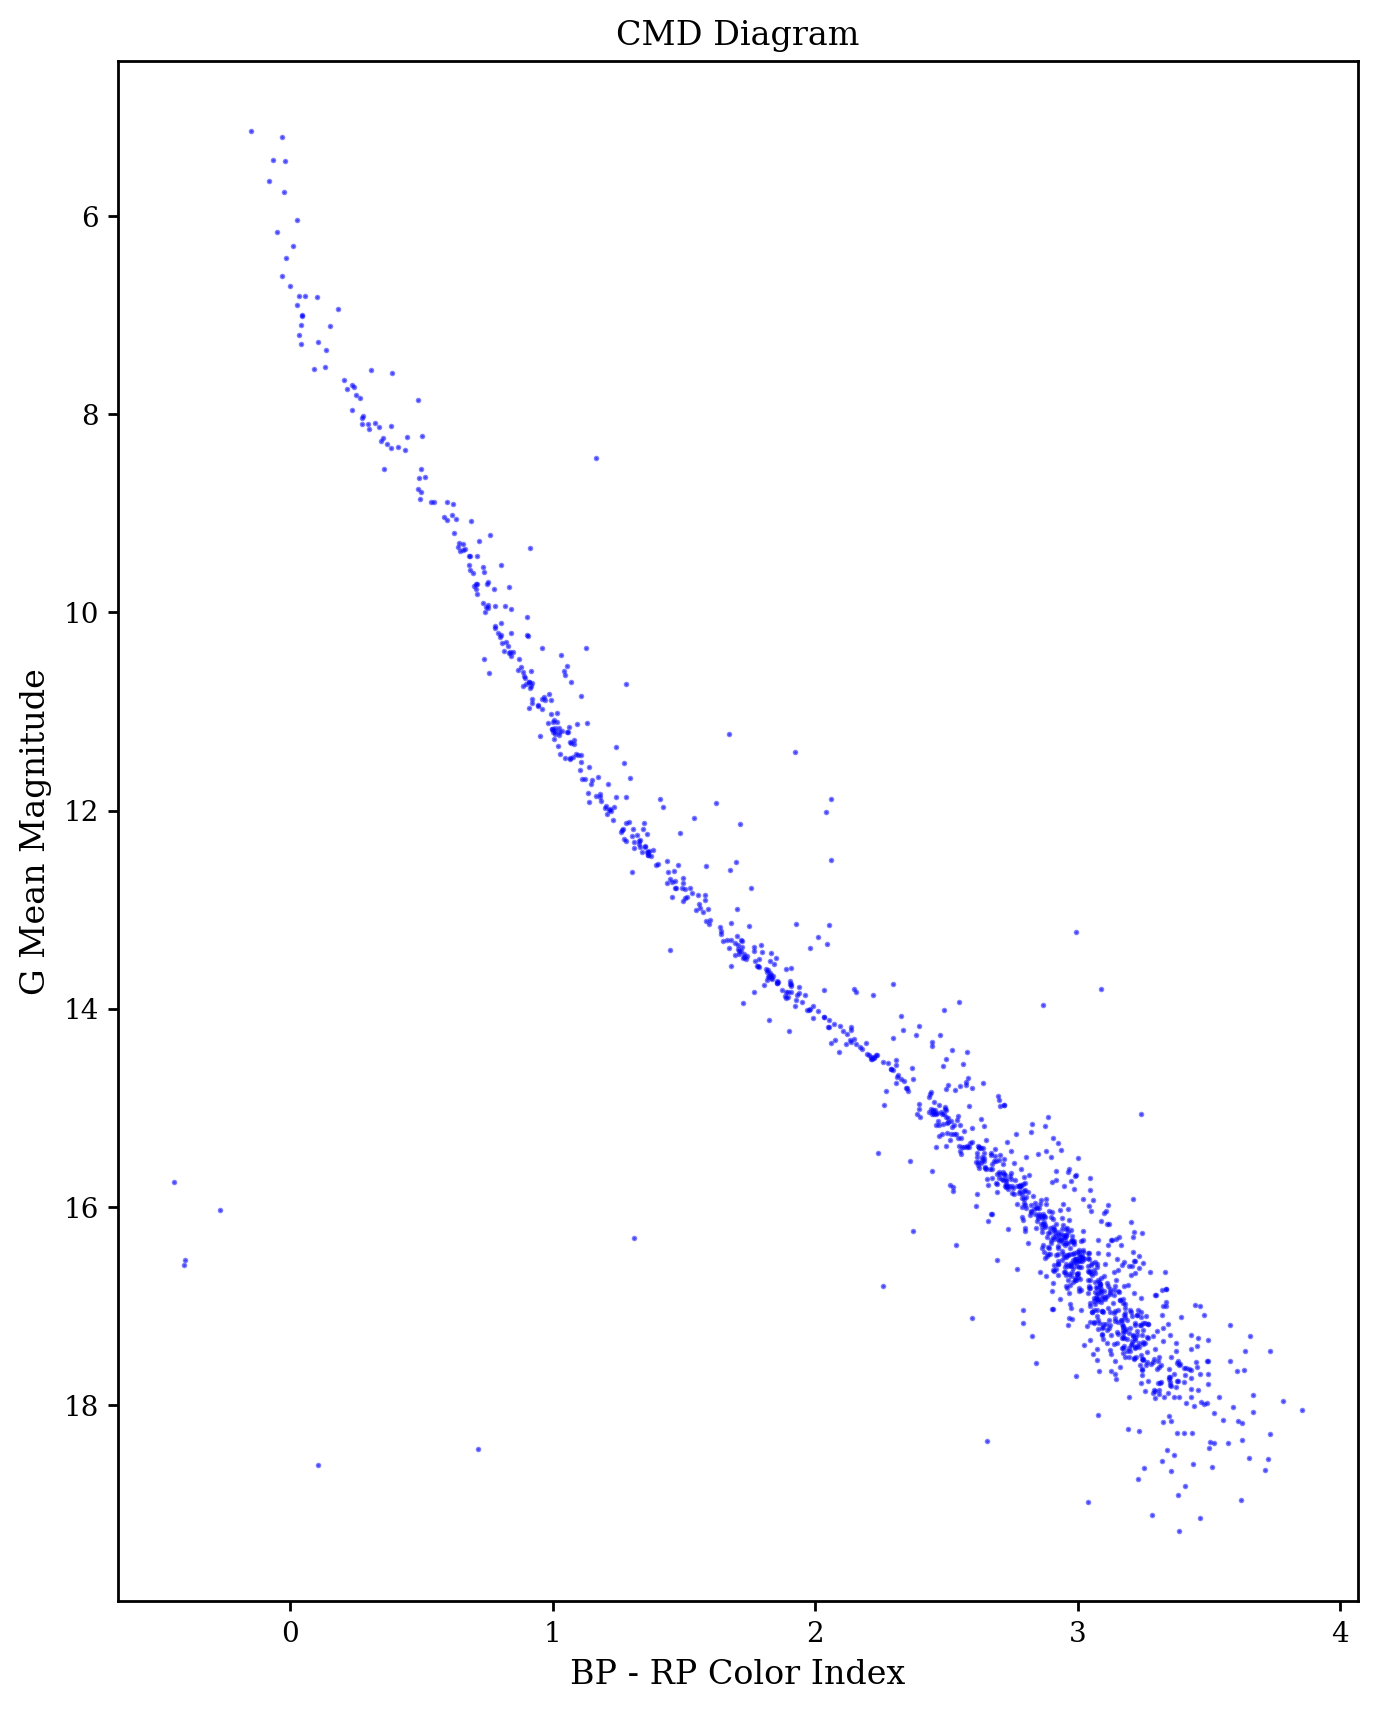

(<Figure size 800x1000 with 1 Axes>,
 <Axes: title={'center': 'CMD Diagram'}, xlabel='BP - RP Color Index', ylabel='G Mean Magnitude'>)

In [72]:
gaia_analyzer.plot_hr_diagram(show=True)

In [73]:
fitter = MISTFitter(data=df, age_range=(70e6, 160e6))

In [74]:
sampler = fitter.sample_cluster(n_walkers=32, n_burn=200, n_steps=2000)

100%|██████████| 2000/2000 [07:27<00:00,  4.47it/s]


Median cluster parameters:
Age=7.44e+07 yr, [Fe/H]=0.26, Distance=144.7 pc, A_V=0.18


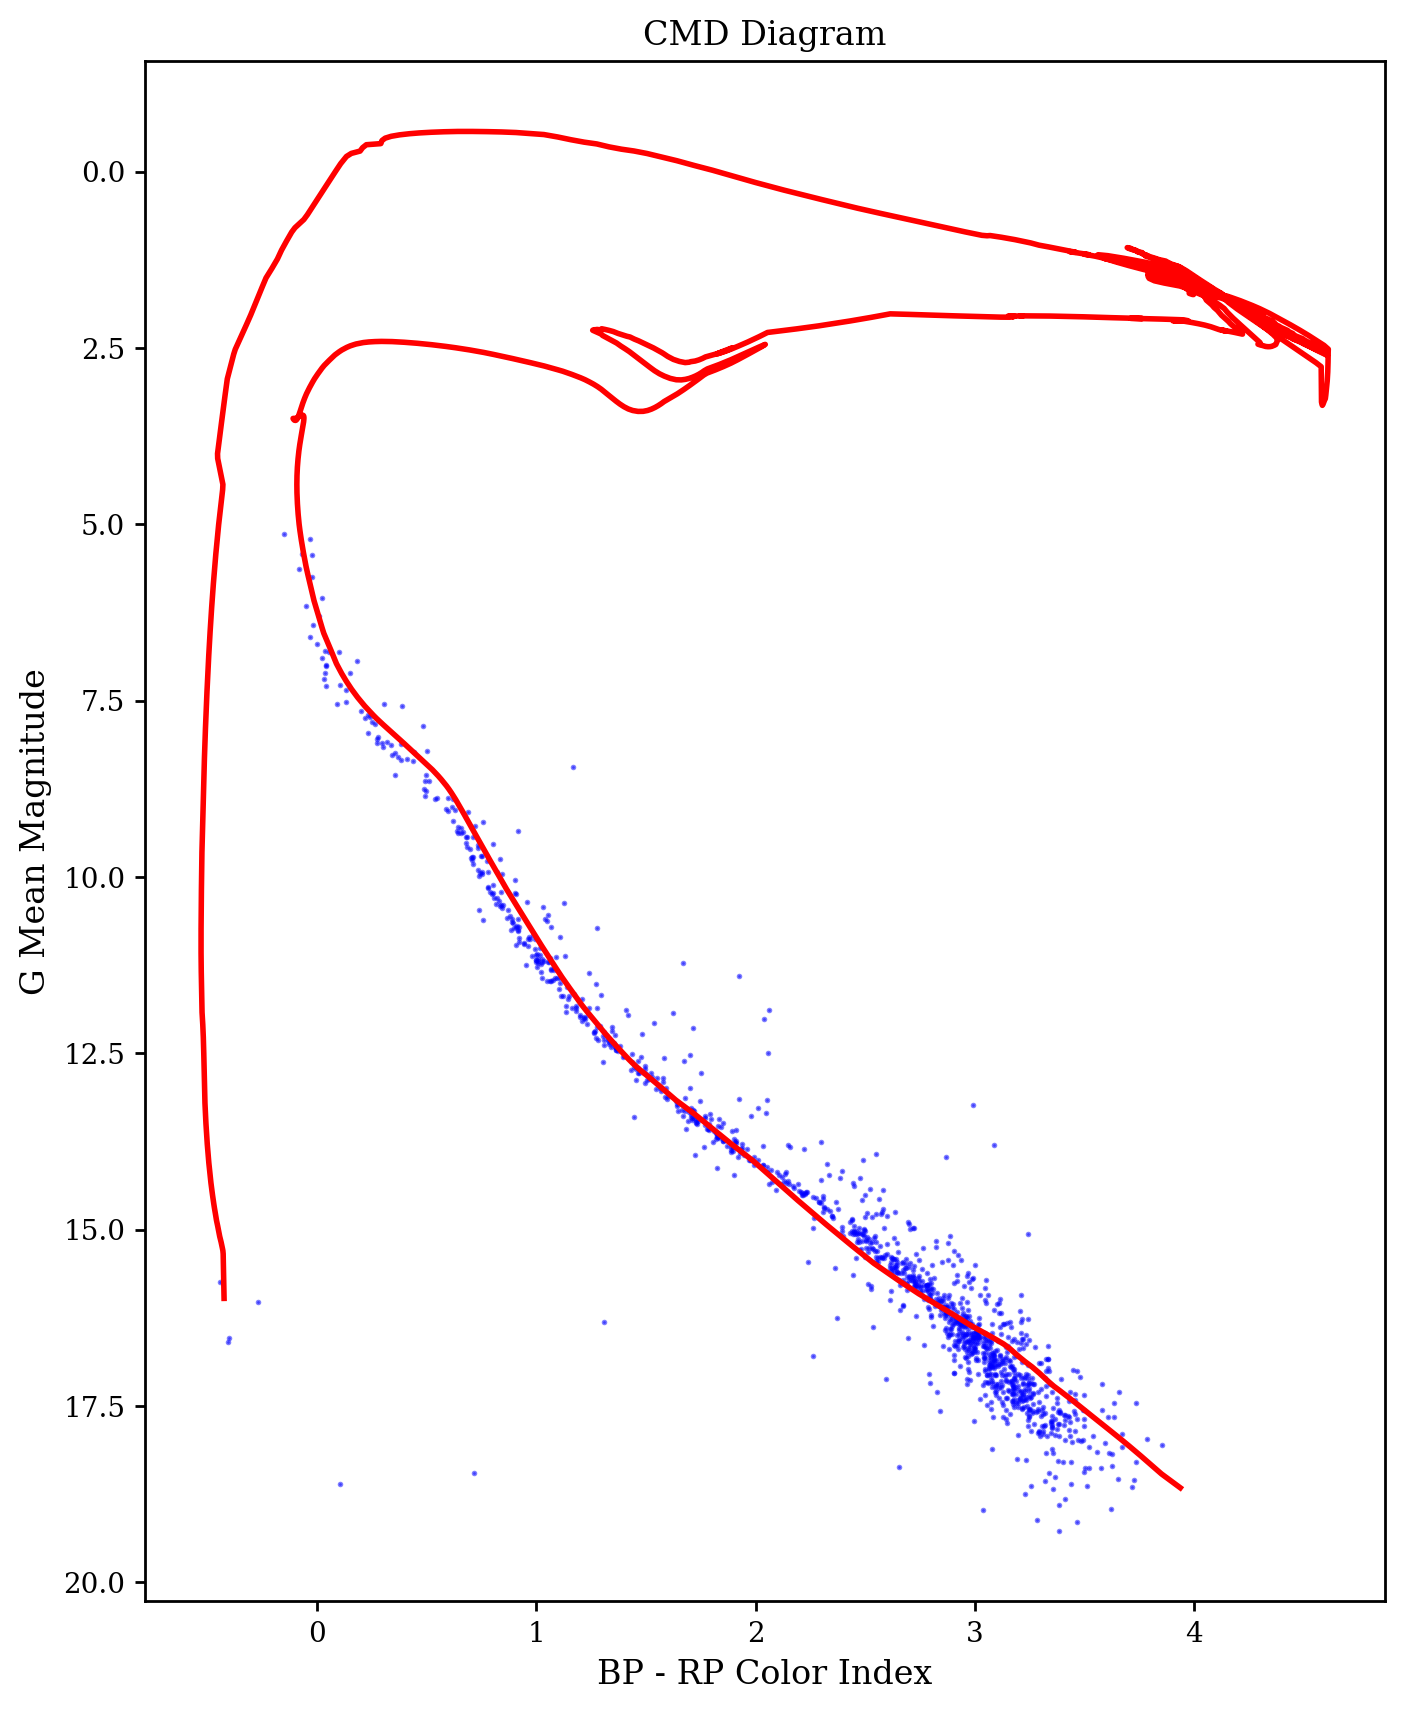

(<Figure size 800x1000 with 1 Axes>,
 <Axes: title={'center': 'CMD Diagram'}, xlabel='BP - RP Color Index', ylabel='G Mean Magnitude'>)

In [75]:
# Step 3: Inspect posterior
samples = fitter.get_samples()
median_params = fitter.get_median_model()
print(f"Median cluster parameters:\nAge={median_params[0]:.2e} yr, [Fe/H]={median_params[1]:.2f}, "
      f"Distance={median_params[2]:.1f} pc, A_V={median_params[3]:.2f}")

# Step 4: Plot median
fitter.plot_isochrone(median_params)

Best cluster parameters:
Age=7.44e+07 yr, [Fe/H]=0.26, Distance=144.7 pc, A_V=0.18


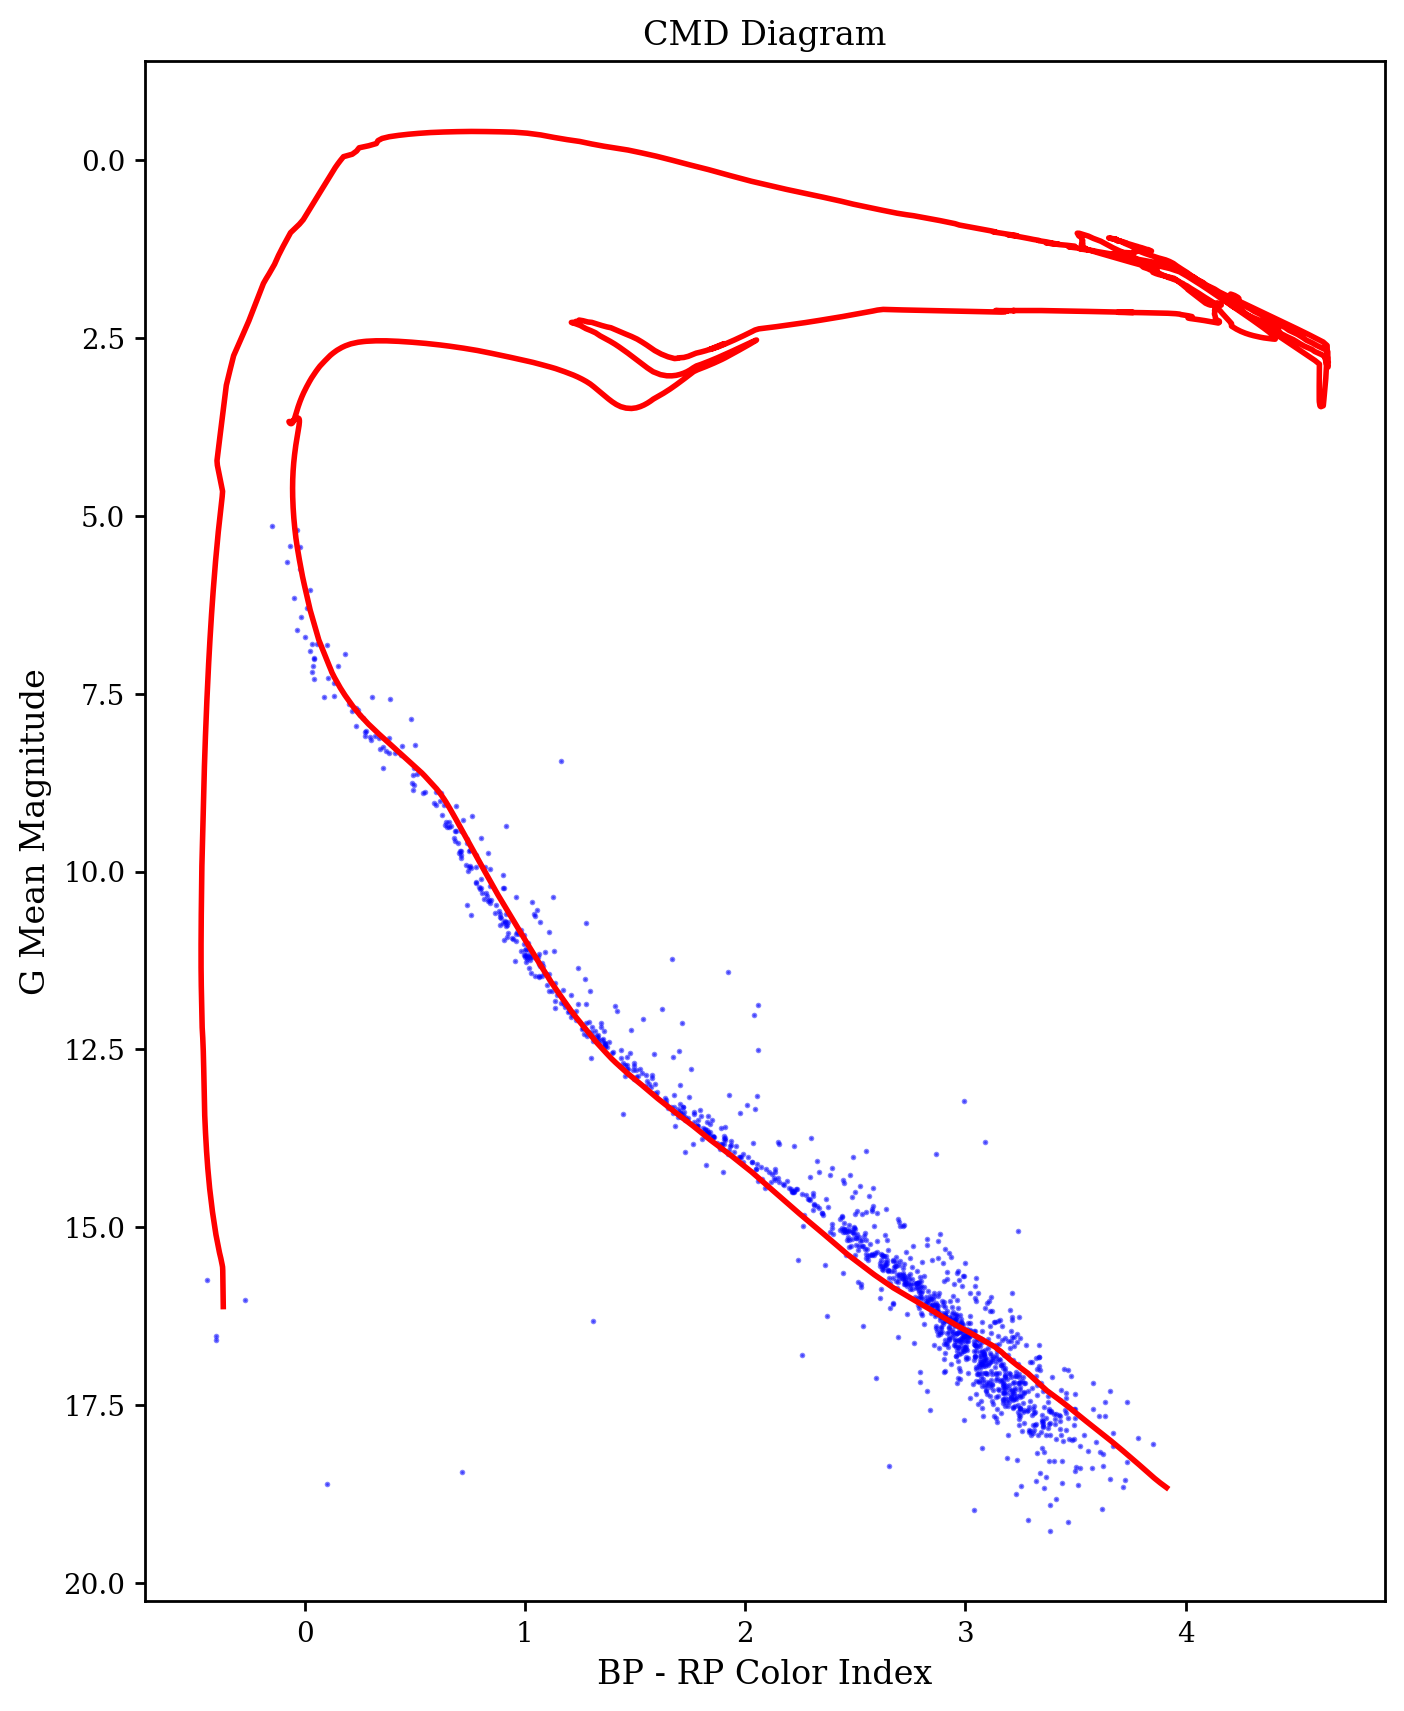

(<Figure size 800x1000 with 1 Axes>,
 <Axes: title={'center': 'CMD Diagram'}, xlabel='BP - RP Color Index', ylabel='G Mean Magnitude'>)

In [76]:
# Step 5: plot best model
best_params = fitter.get_best_model()
print(f"Best cluster parameters:\nAge={median_params[0]:.2e} yr, [Fe/H]={median_params[1]:.2f}, "
      f"Distance={median_params[2]:.1f} pc, A_V={median_params[3]:.2f}")

# Step 4: Plot median
fitter.plot_isochrone(best_params)

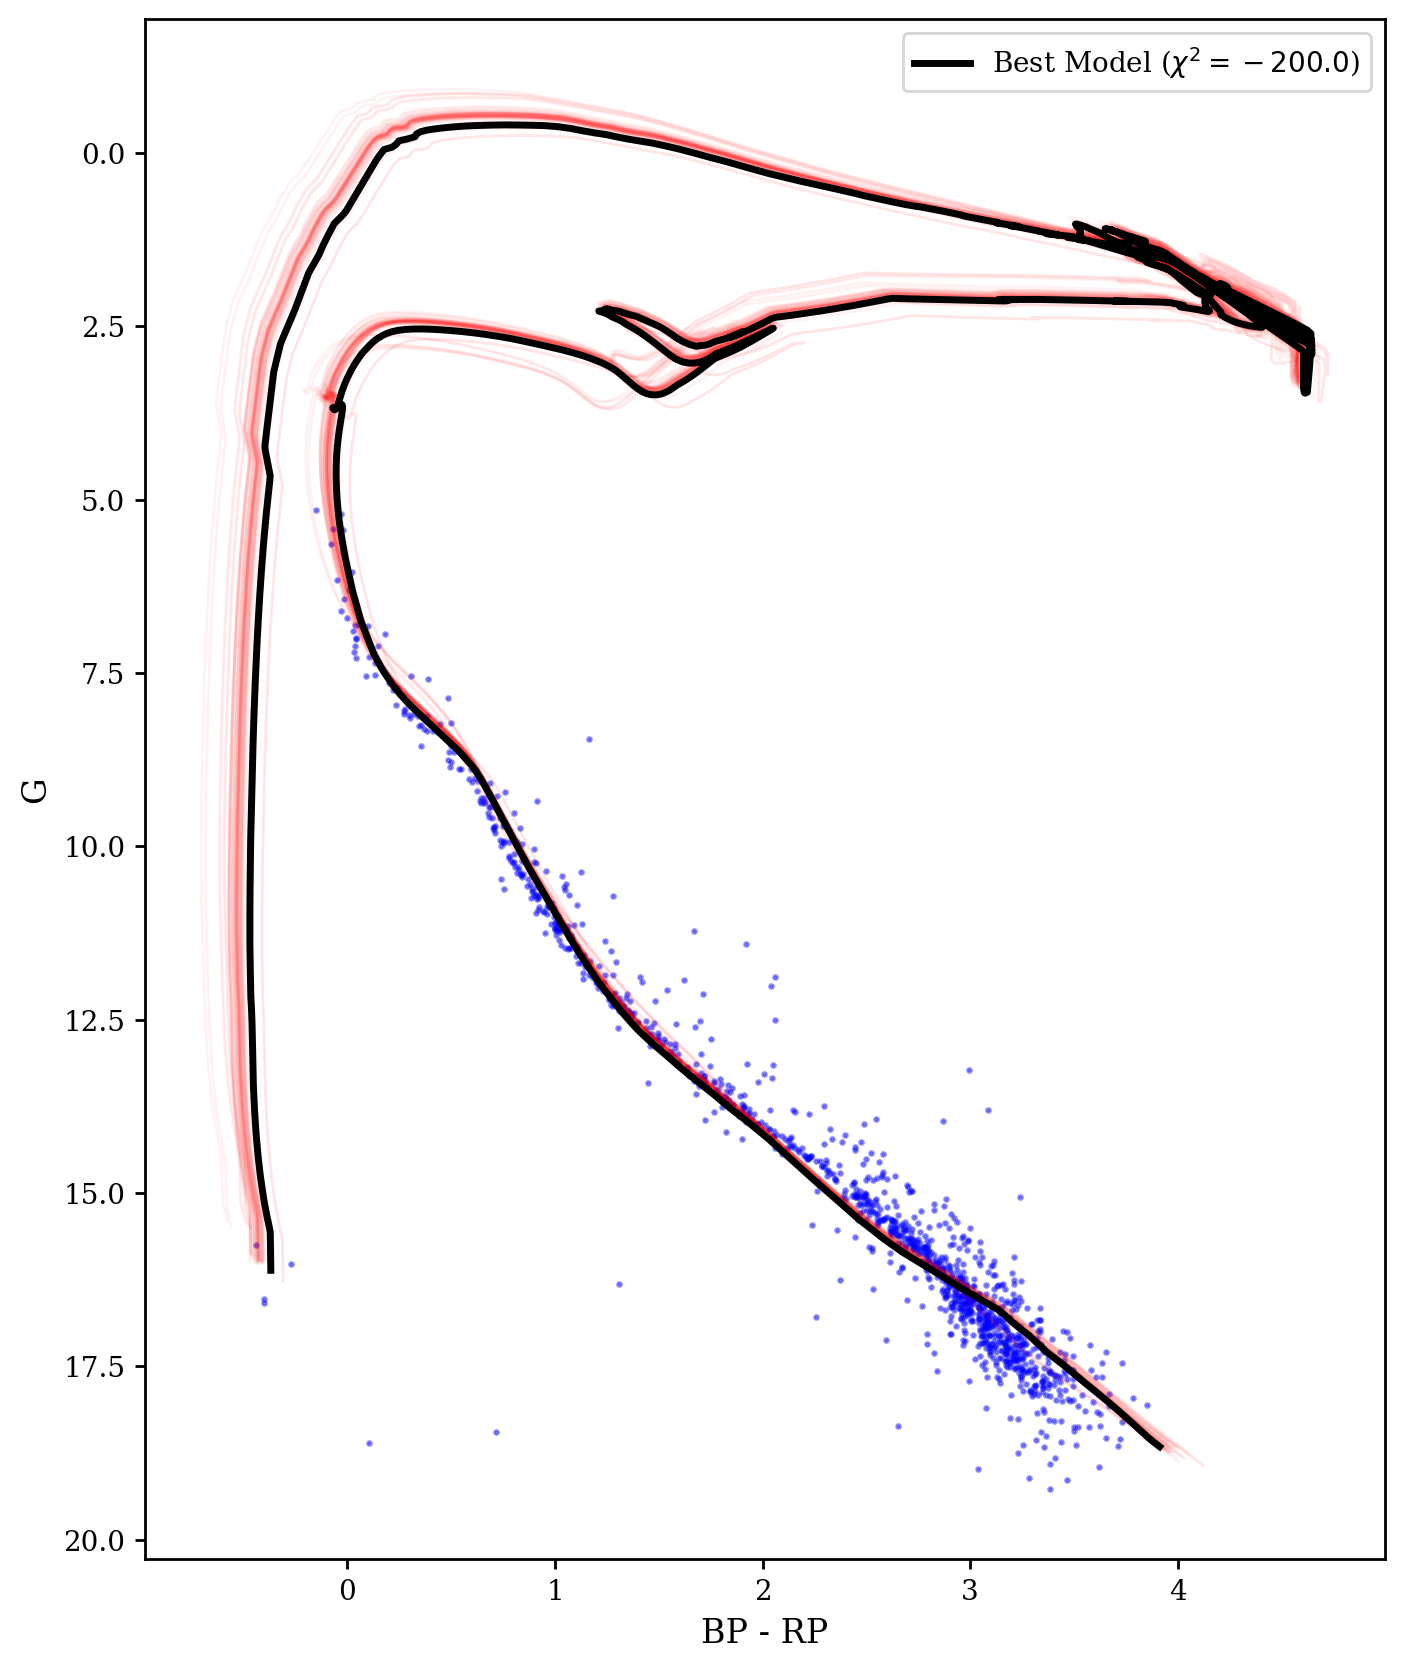

(<Figure size 800x1000 with 1 Axes>, <Axes: xlabel='BP - RP', ylabel='G'>)

In [77]:
fitter.plot_good_isochrones(chi2_cutoff=1)

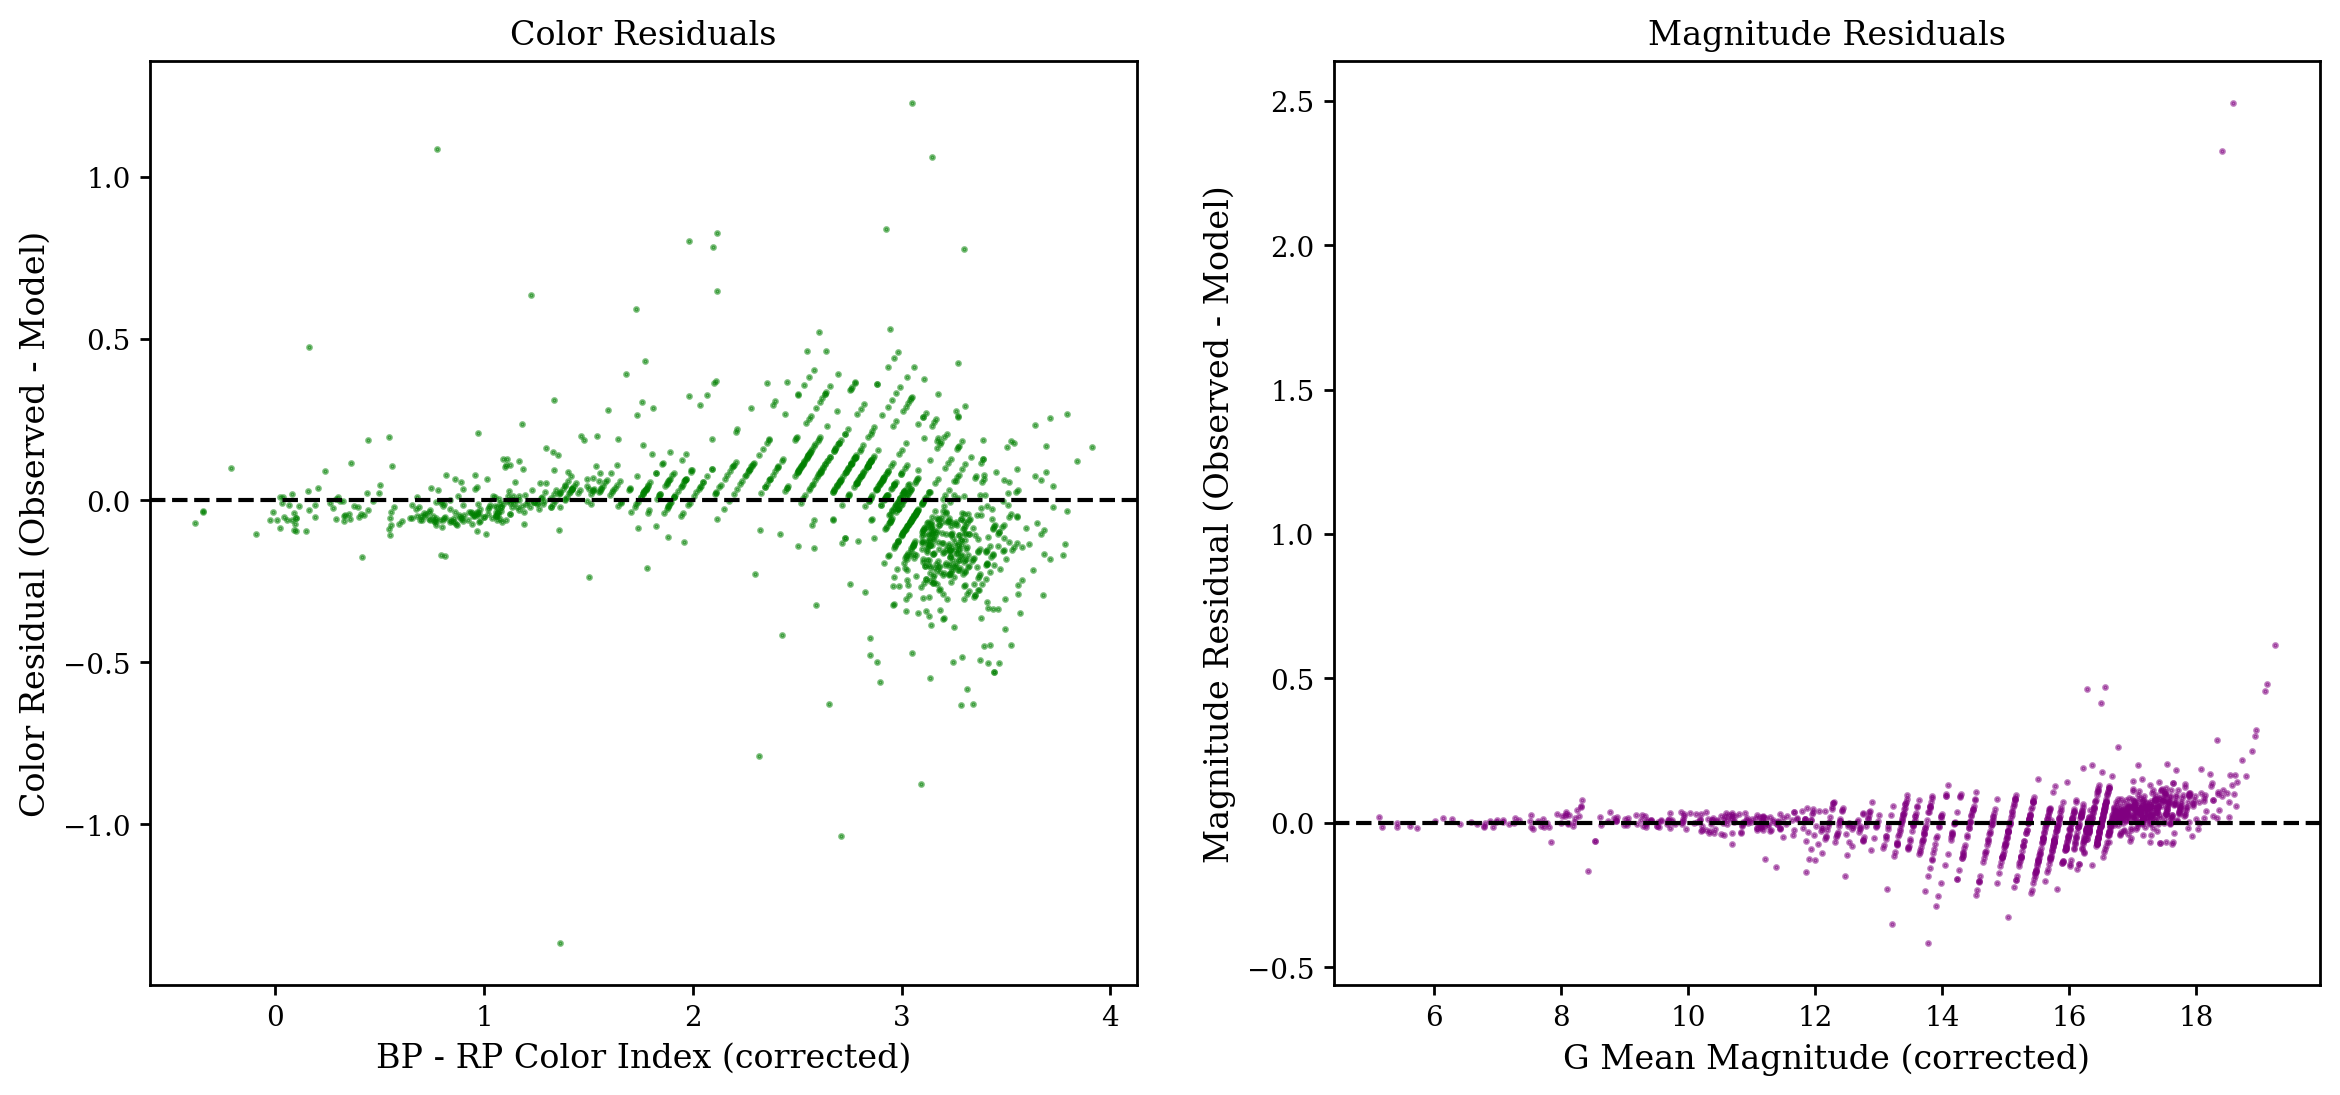

(<Figure size 1400x600 with 2 Axes>,
 (<Axes: title={'center': 'Color Residuals'}, xlabel='BP - RP Color Index (corrected)', ylabel='Color Residual (Observed - Model)'>,
  <Axes: title={'center': 'Magnitude Residuals'}, xlabel='G Mean Magnitude (corrected)', ylabel='Magnitude Residual (Observed - Model)'>))

In [78]:
fitter.plot_residuals(theta=fitter.get_best_model())

In [99]:
fitter.bic()

442.93080131815714

2025-11-12 23:06:42,689 - WARNING - Too few points to create valid contours


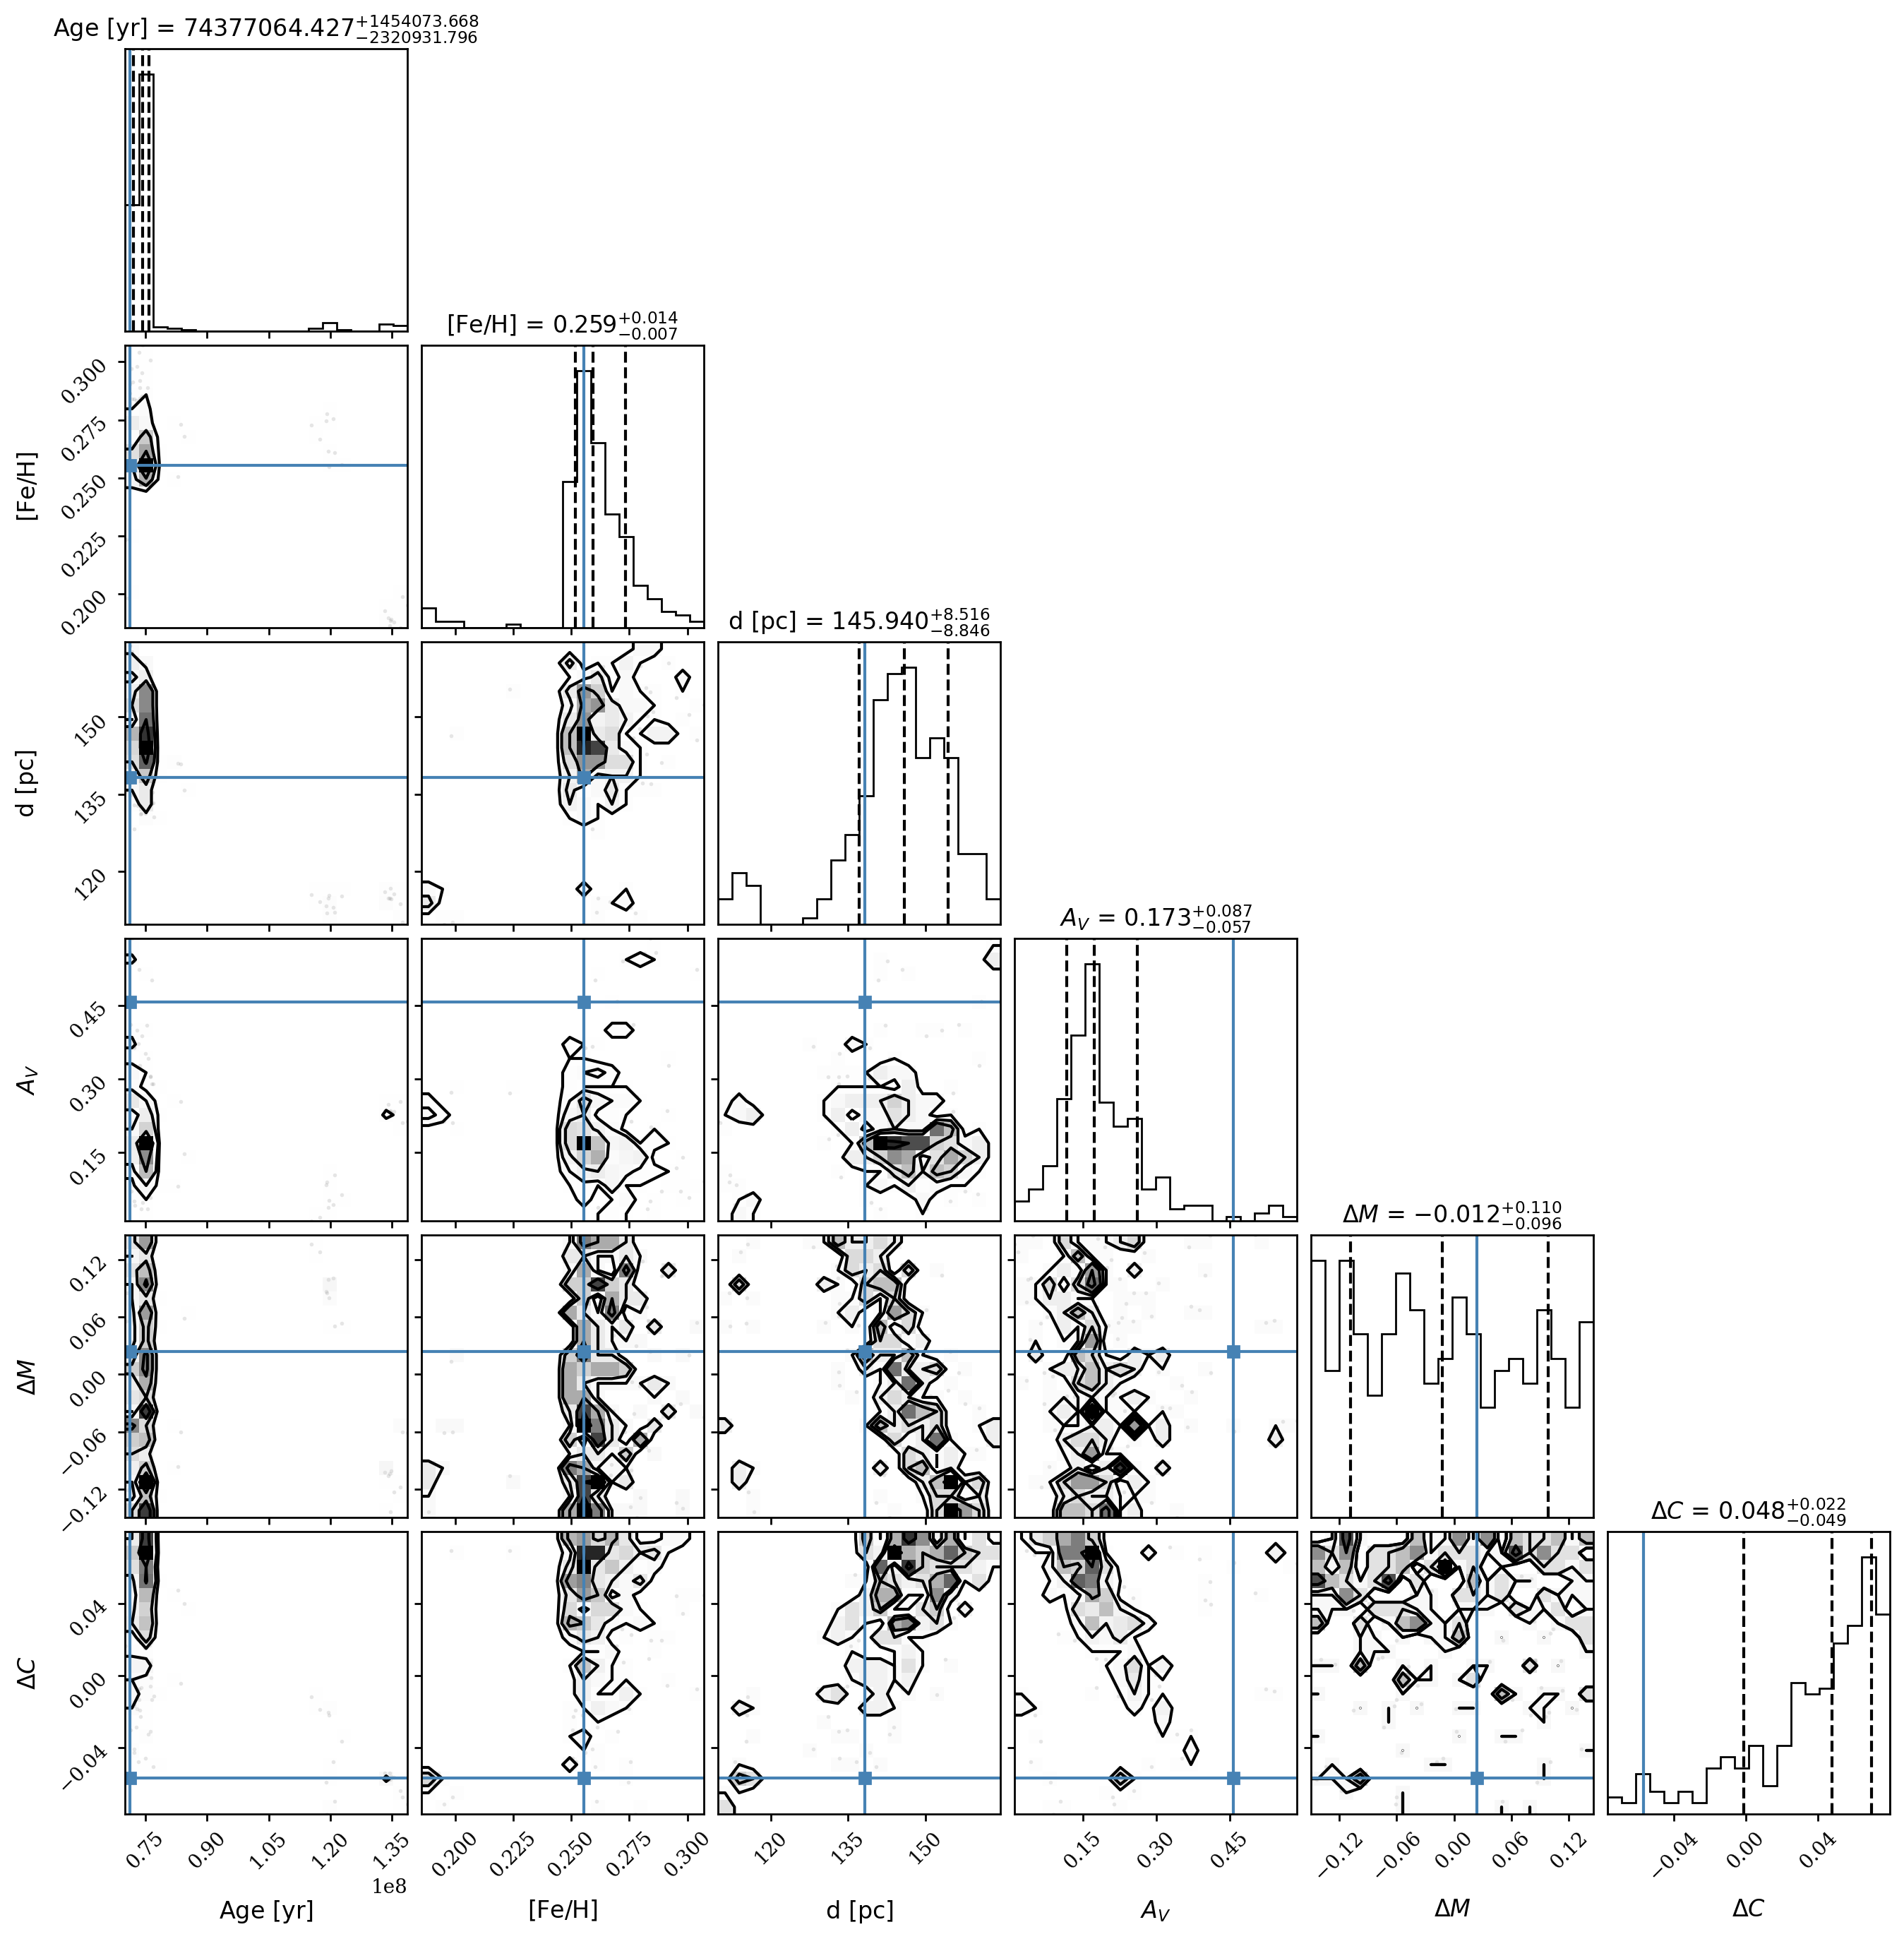

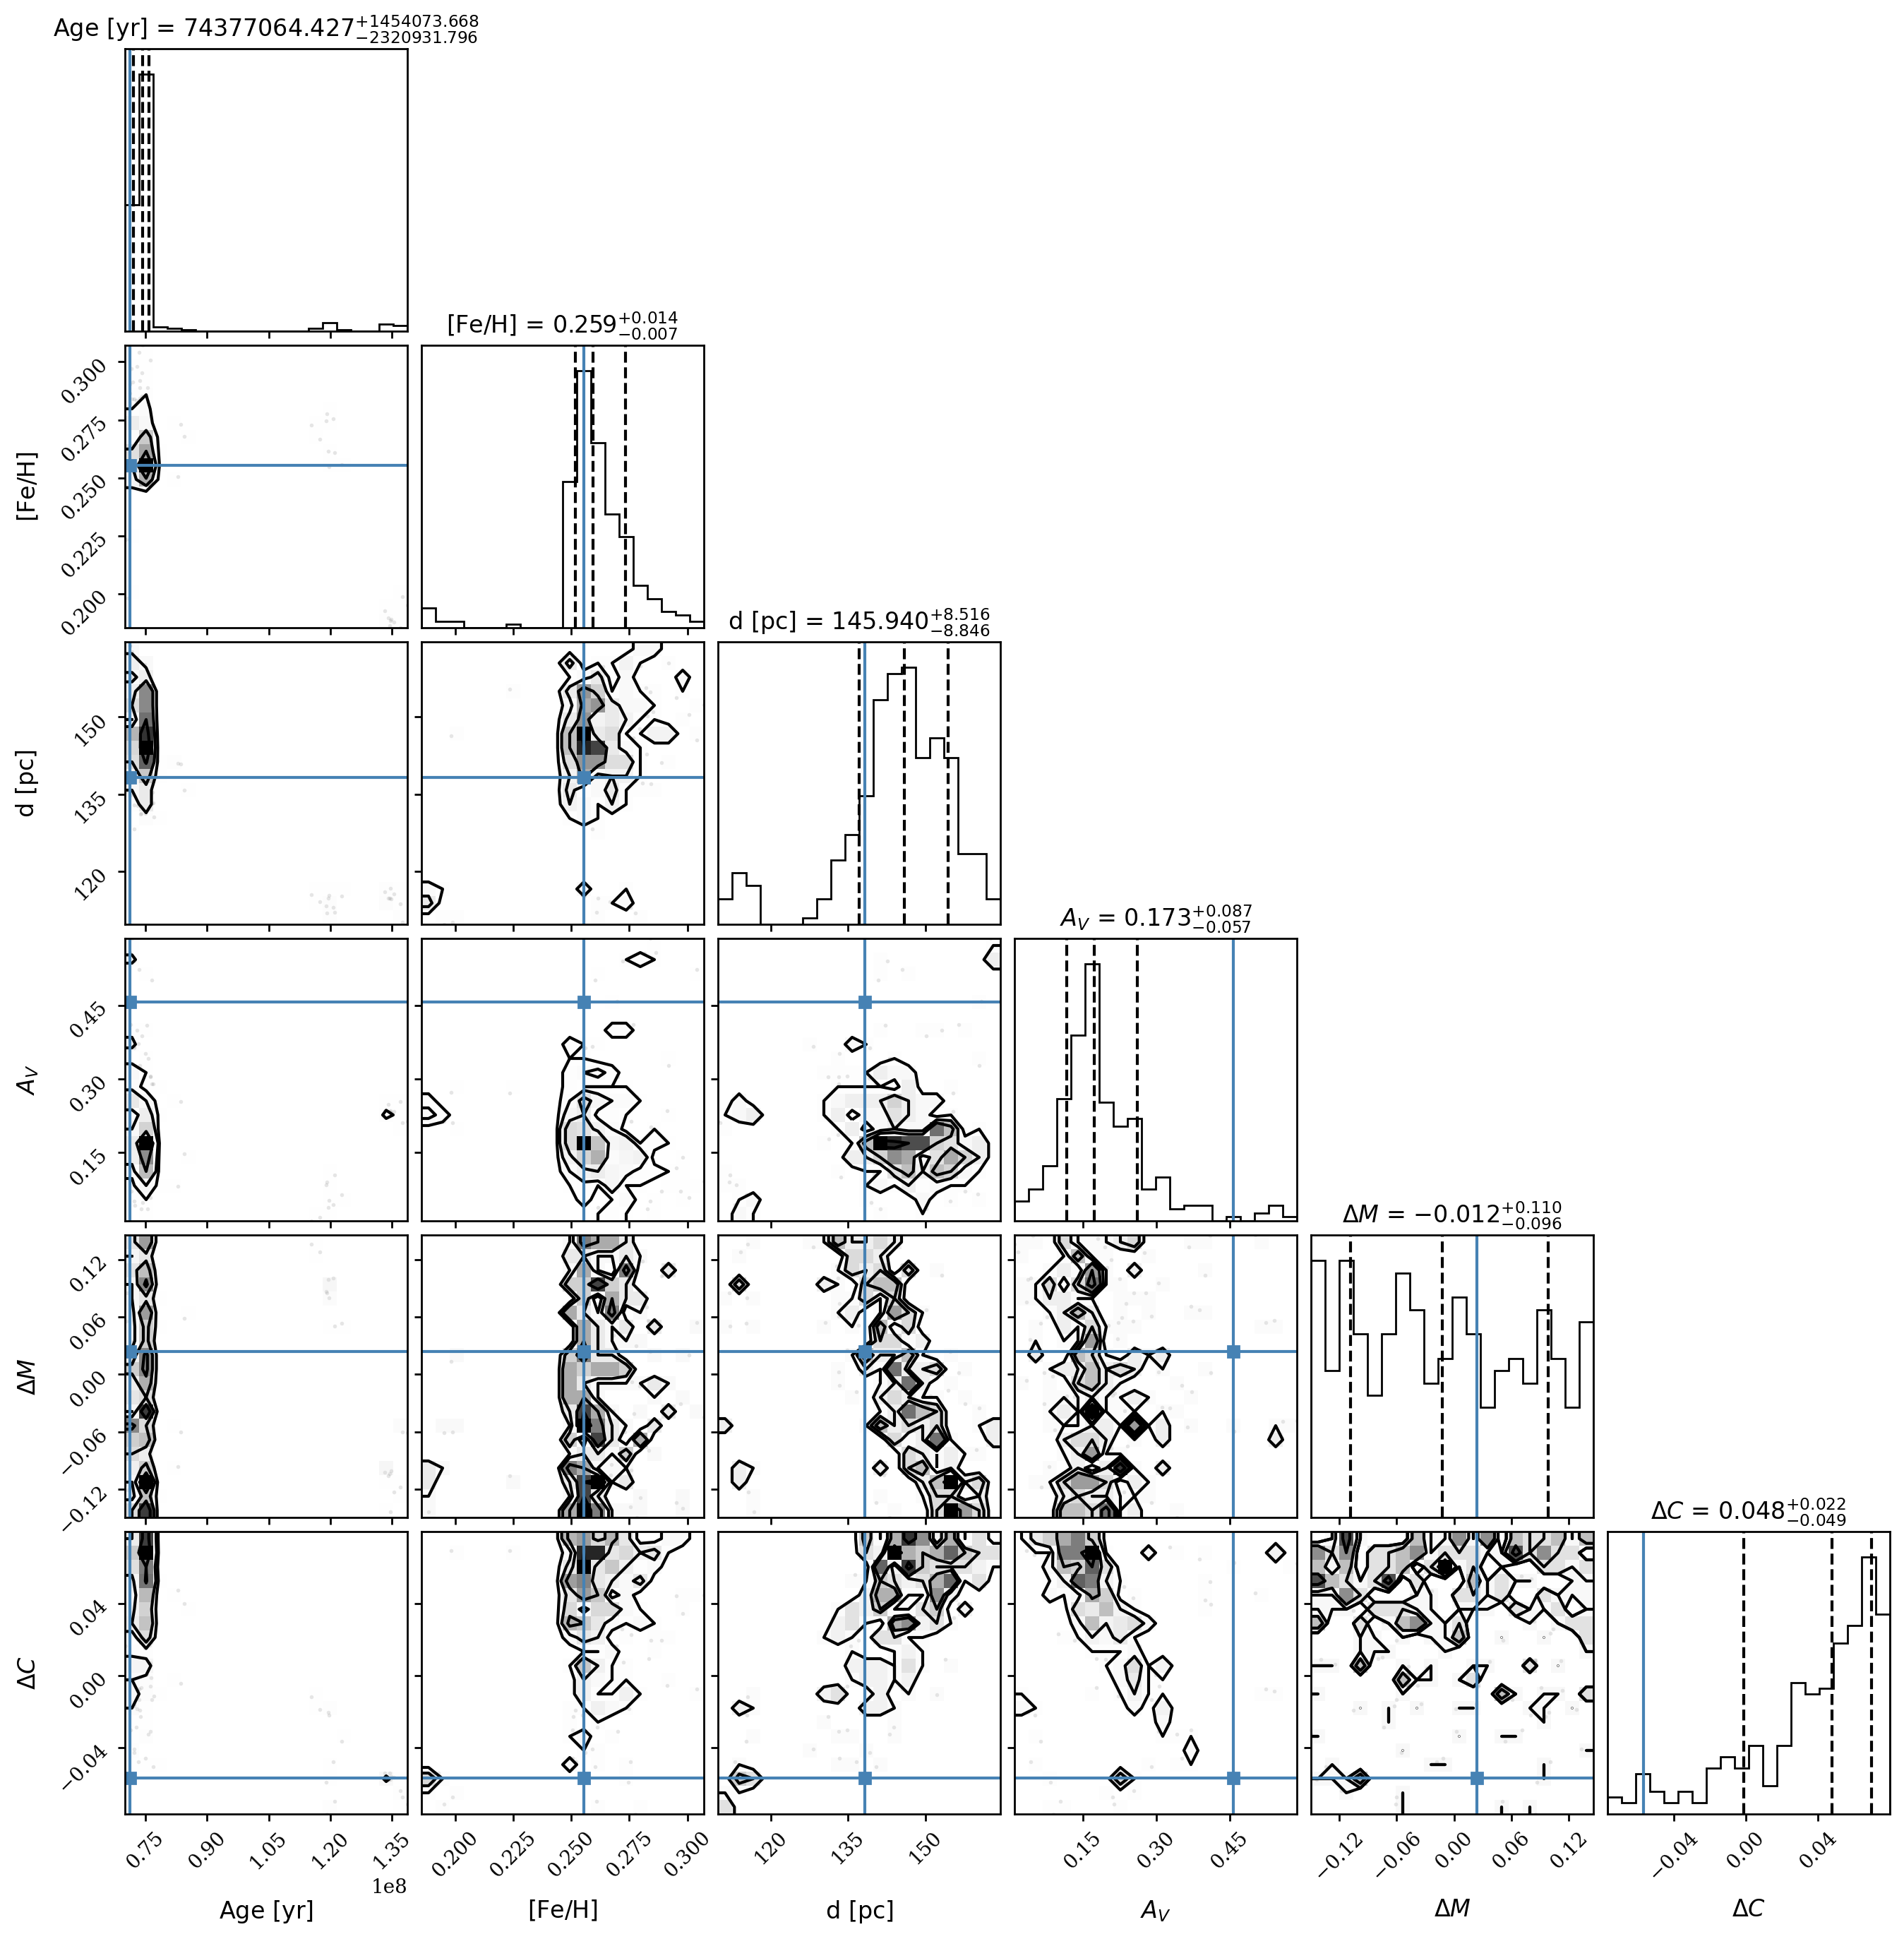

In [79]:
fitter.plot_corner(sampler, discard=200, thin=200)

/var/folders/12/zdvhzg650g17gbnt14_55w_m0000gn/T/ipykernel_72641/3032949427.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  isochrone_df = pd.read_csv('data/mist_isochrone_140Myr.dat', delim_whitespace=True, comment='#')


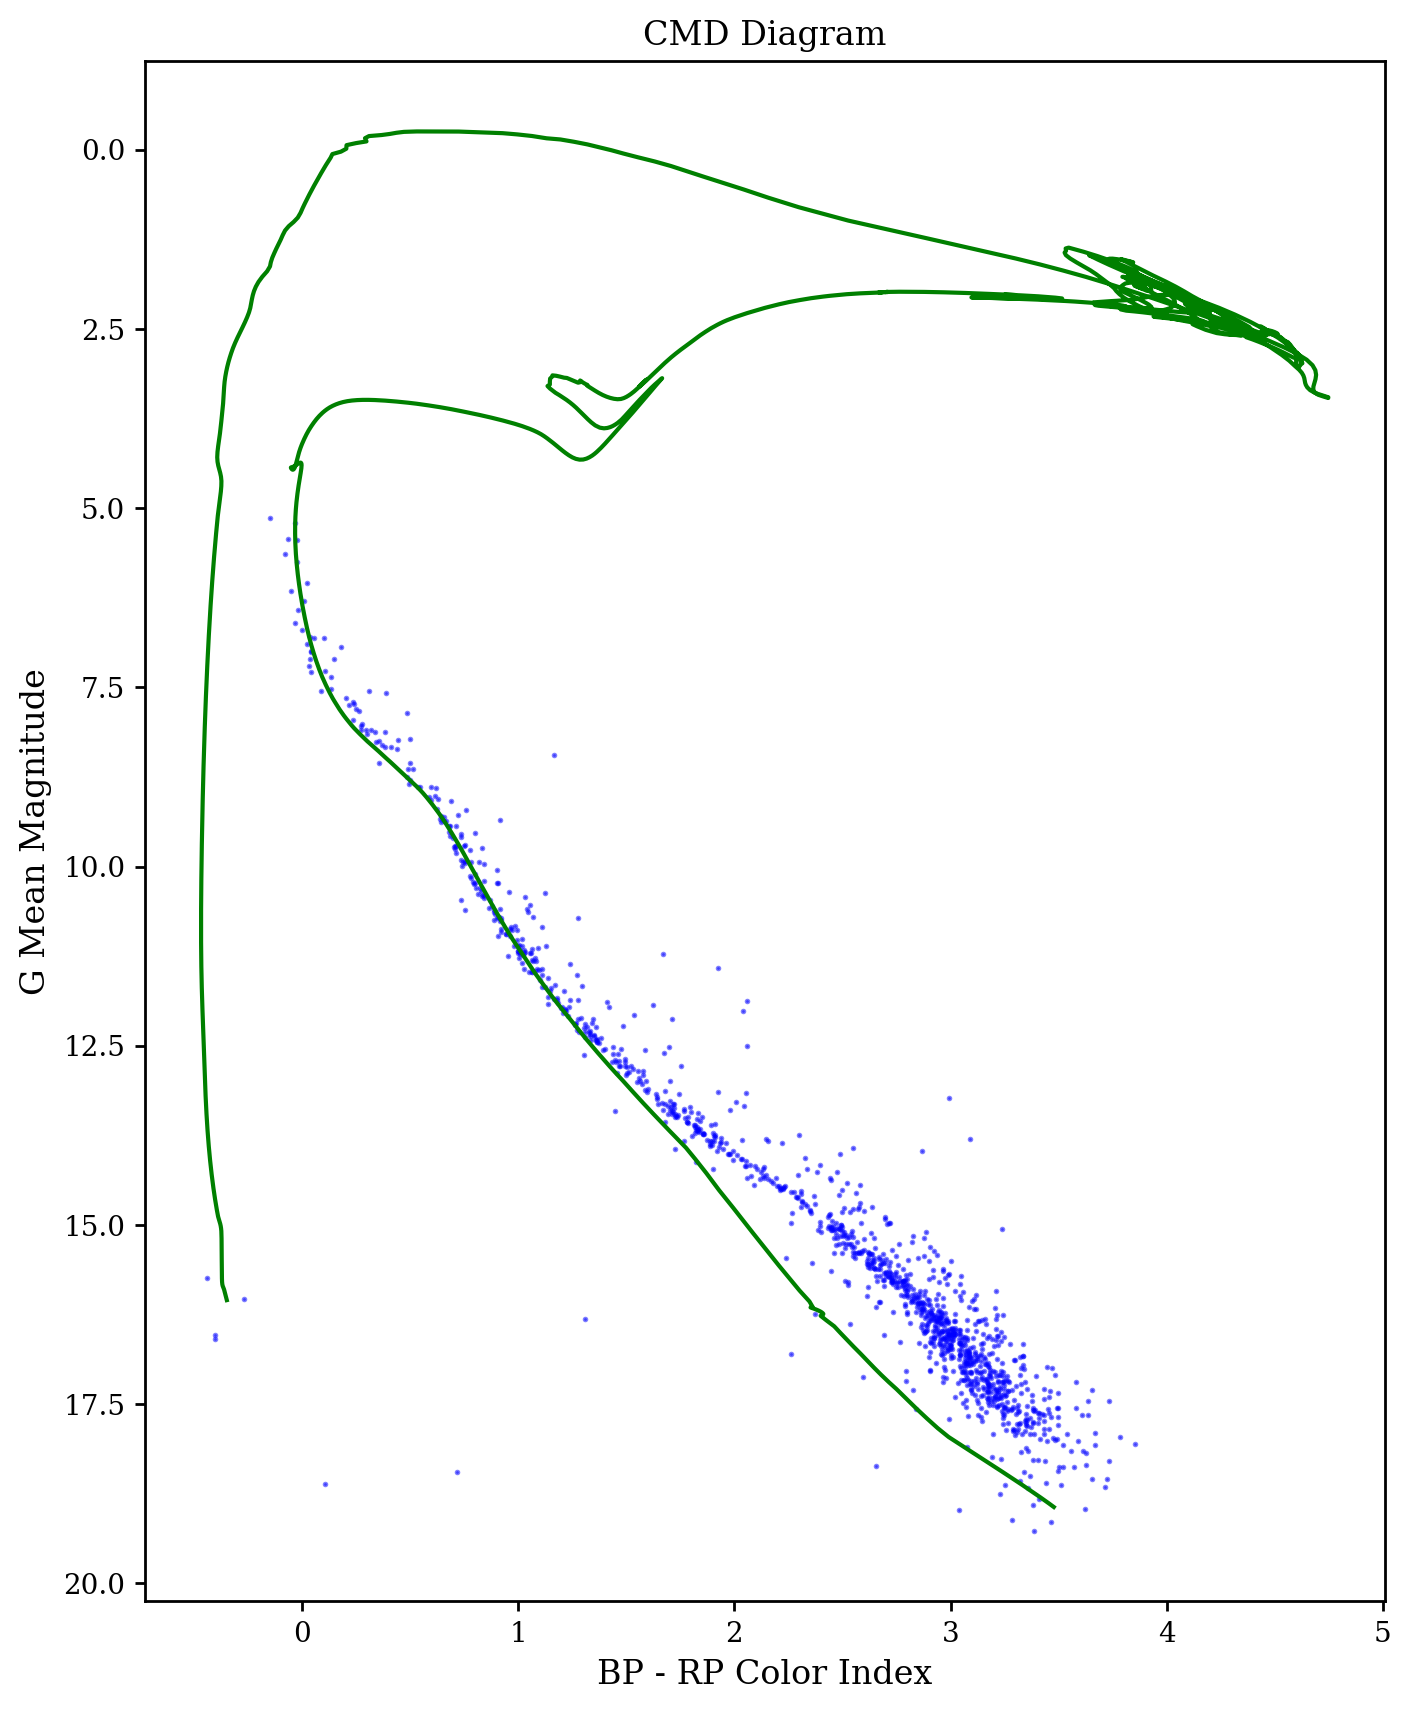

In [80]:
# Testing using actual isochrone
import pandas as pd

isochrone_df = pd.read_csv('data/mist_isochrone_140Myr.dat', delim_whitespace=True, comment='#')
fig, ax = gaia_analyzer.plot_hr_diagram(show=False)

isochrone_df['color'] = isochrone_df['Gaia_BP_EDR3'] - isochrone_df['Gaia_RP_EDR3'] + 0.15
isochrone_df['magnitude'] = isochrone_df['Gaia_G_EDR3'] + 6

ax.plot(isochrone_df['color'], isochrone_df['magnitude'], color='green', label='Isochrone')
plt.show()

In [124]:
from analyzer import BinaryMixtureFitter

binary_fitter = BinaryMixtureFitter(data=df)
binary_fitter.fit(theta=fitter.get_best_model())

print(binary_fitter.get_mixture_weights())

2025-11-13 00:21:40,166 - INFO - Starting EM fit
2025-11-13 00:21:40,167 - INFO - Initial weights: [0.8 0.2 0. ]
  0%|          | 0/40 [00:00<?, ?it/s]2025-11-13 00:21:42,384 - INFO - lnL stats | single: mean=-0.87 max=0.26, binary: mean=-0.59 max=0.18, field: mean=0.00 max=0.00
2025-11-13 00:21:42,385 - INFO - Updated mixture weights: [6.81165288e-01 3.18445152e-01 3.89559797e-04]
  2%|▎         | 1/40 [00:02<01:26,  2.22s/it]2025-11-13 00:21:42,389 - INFO - lnL stats | single: mean=-0.87 max=0.26, binary: mean=-0.59 max=0.18, field: mean=0.00 max=0.00
2025-11-13 00:21:42,389 - INFO - Updated mixture weights: [0.58190474 0.39710388 0.02099138]
2025-11-13 00:21:42,392 - INFO - lnL stats | single: mean=-0.87 max=0.26, binary: mean=-0.59 max=0.18, field: mean=0.00 max=0.00
2025-11-13 00:21:42,393 - INFO - Updated mixture weights: [0.4850999  0.41279864 0.10210146]
2025-11-13 00:21:42,395 - INFO - lnL stats | single: mean=-0.87 max=0.26, binary: mean=-0.59 max=0.18, field: mean=0.00 max=0

[0.22915825 0.26105969 0.50978205]


In [125]:
binary_fitter.get_probability("796443724462555904")

2025-11-13 00:22:02,800 - INFO - lnL stats | single: mean=-0.87 max=0.26, binary: mean=-0.59 max=0.18, field: mean=0.00 max=0.00


{'single': 1.2275525438764494e-08,
 'binary': 2.4900975739994404e-08,
 'field': 0.9999999628234988}

In [114]:
from downloader import LightCurveExtractor

lightcurve_analyzer = LightCurveExtractor(download_dir='lightcurves/')

# ids = gaia_analyzer.extract_source_ids()[:10]
# lightcurves = lightcurve_analyzer.extract_gaia_lightcurves(ids)

ids = gaia_analyzer.extract_source_ids()
lightcurves = lightcurve_analyzer.extract_eb_lightcurves(ids)

2025-11-12 23:52:23,553 - INFO - Set Lightkurve download directory to lightcurves/
2025-11-12 23:52:23,554 - INFO - Downloading TESS Eclipsing Binary catalog...
2025-11-12 23:52:23,855 - INFO - Saved TESS EB catalog to data/tess_eb_catalog.csv
2025-11-12 23:52:51,332 - WARNING - No TIC match for 3 Gaia IDs: [67680850564641792, 70190249631846272, 52035251073077120]...
  0%|          | 0/1276 [00:00<?, ?it/s]2025-11-12 23:52:51,333 - INFO - Inspecting for EB membership: Gaia 3763976194792448 -> TIC 377056867
2025-11-12 23:52:51,334 - INFO - Inspecting for EB membership: Gaia 11352324413414016 -> TIC 416678539
2025-11-12 23:52:51,334 - INFO - Inspecting for EB membership: Gaia 19817739313090688 -> TIC 620010441
2025-11-12 23:52:51,334 - INFO - Inspecting for EB membership: Gaia 43733079289895424 -> TIC 434162270
2025-11-12 23:52:51,335 - INFO - Inspecting for EB membership: Gaia 46438771249859840 -> TIC 456886532
2025-11-12 23:52:51,335 - INFO - Inspecting for EB membership: Gaia 46922075

In [115]:
lightcurves

{'796443724462555904': (array([1870.45060174, 1870.45199067, 1870.4533796 , ..., 2635.9877195 ,
         2635.98910834, 2635.99049718]),
  MaskedNDArray([1.00473648, 1.01404445, 0.99949069, ..., 1.00142591,
                 0.99244537, 0.99750349]),
  <TessLightCurve length=31866 LABEL="TIC 67646988" SECTOR=48 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
         time             flux      ...   pos_corr1      pos_corr2   
                                    ...      pix            pix      
         Time           float64     ...    float32        float32    
  ------------------ -------------- ... -------------- --------------
   1870.450601743111  1.0047365e+00 ...  2.3839397e-02 -8.5121281e-02
   1870.451990670987  1.0140445e+00 ...  2.2470890e-02 -8.9913927e-02
  1870.4533795988639  9.9949069e-01 ...  2.3171166e-02 -9.1443755e-02
    1870.45476852674  1.0114602e+00 ...  2.4238938e-02 -8.2975447e-02
   1870.456157455082  1.0098795e+00 ...  2.1894285e-02 -8.7038614e-02
  1870.4575463829578 

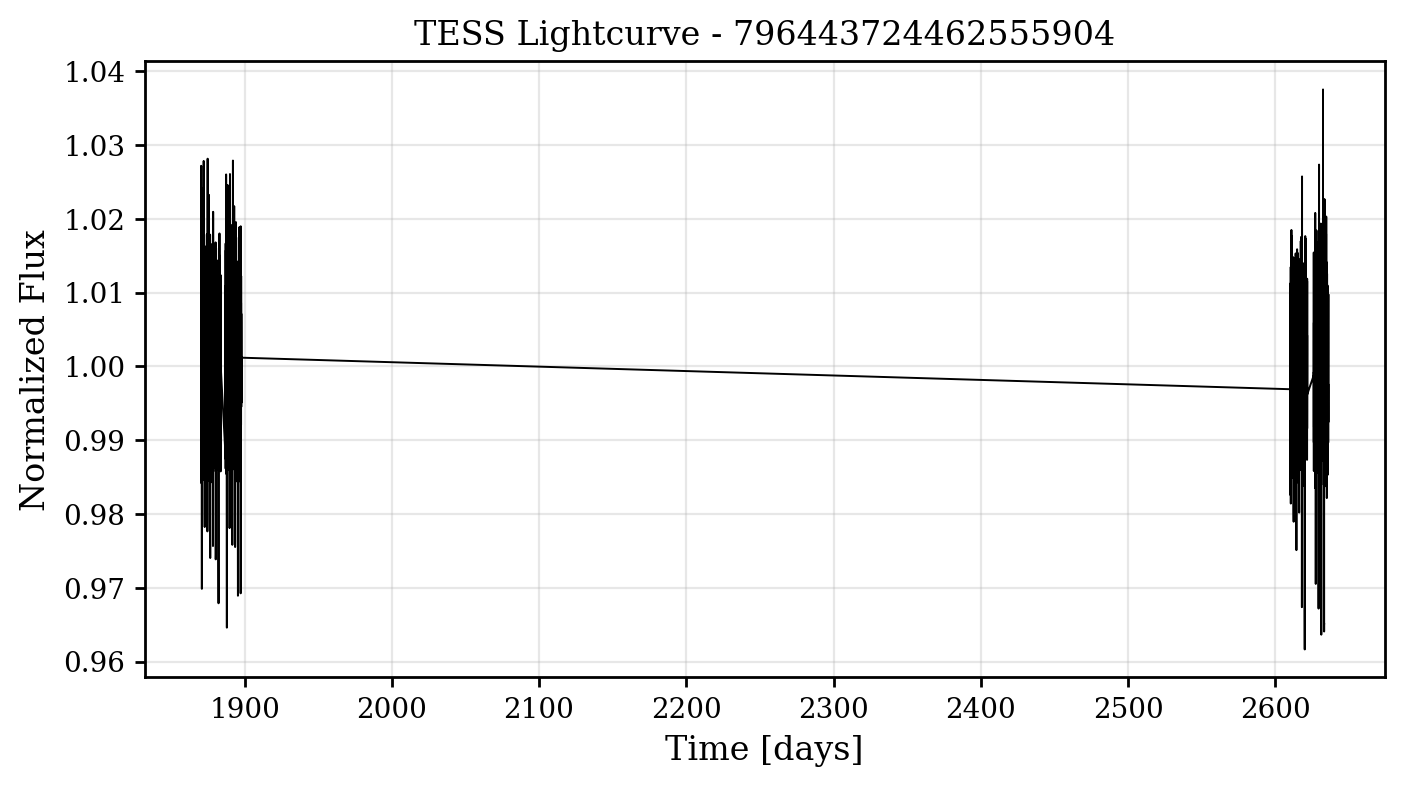

In [116]:
from analyzer import TESSAnalyzer

tess_analyzer = TESSAnalyzer(lightcurves=lightcurves)
tess_analyzer.batch_plot()

2025-11-12 23:58:06,903 - INFO - Analyzing lightcurve for 796443724462555904


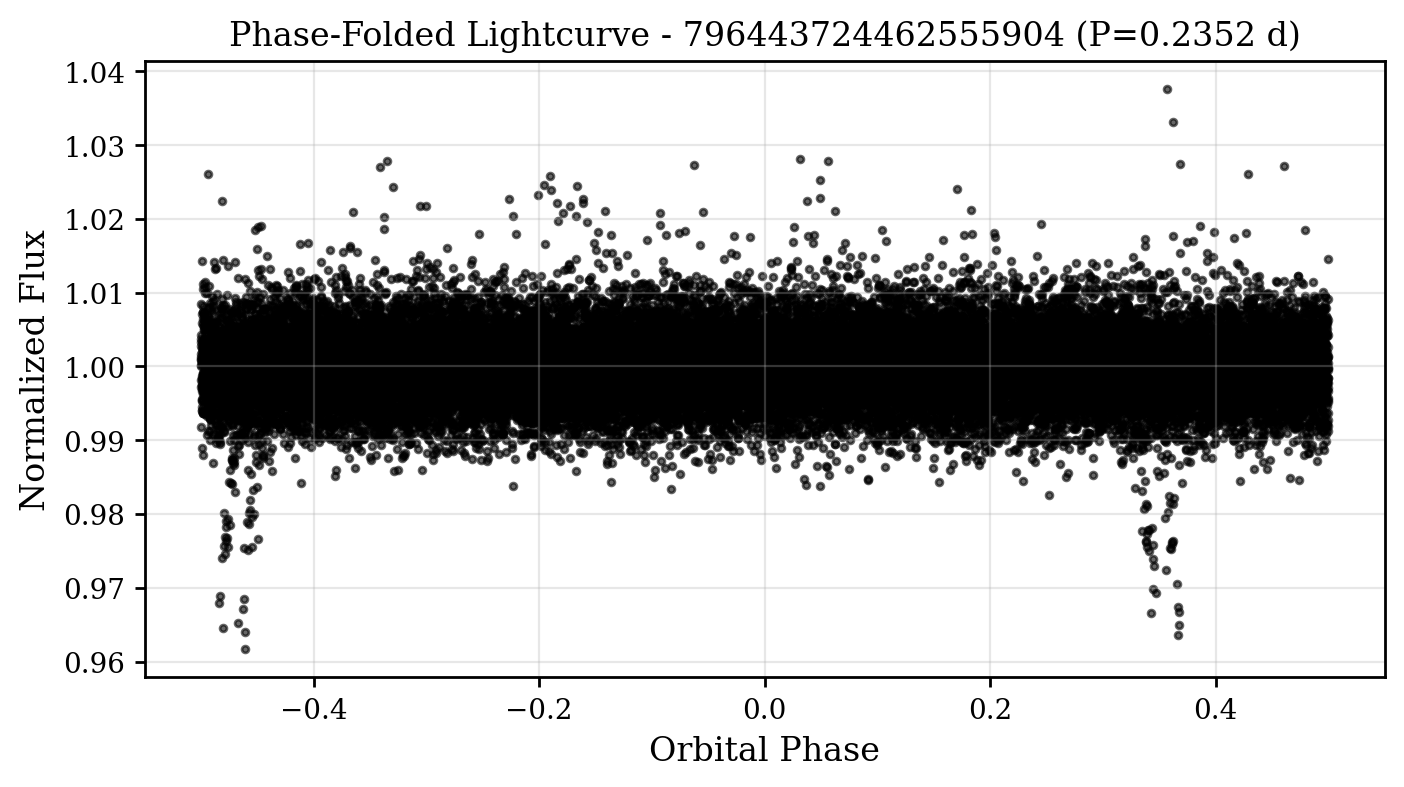

In [117]:
results = tess_analyzer.batch_analyze()
tess_analyzer.batch_plot_folded()

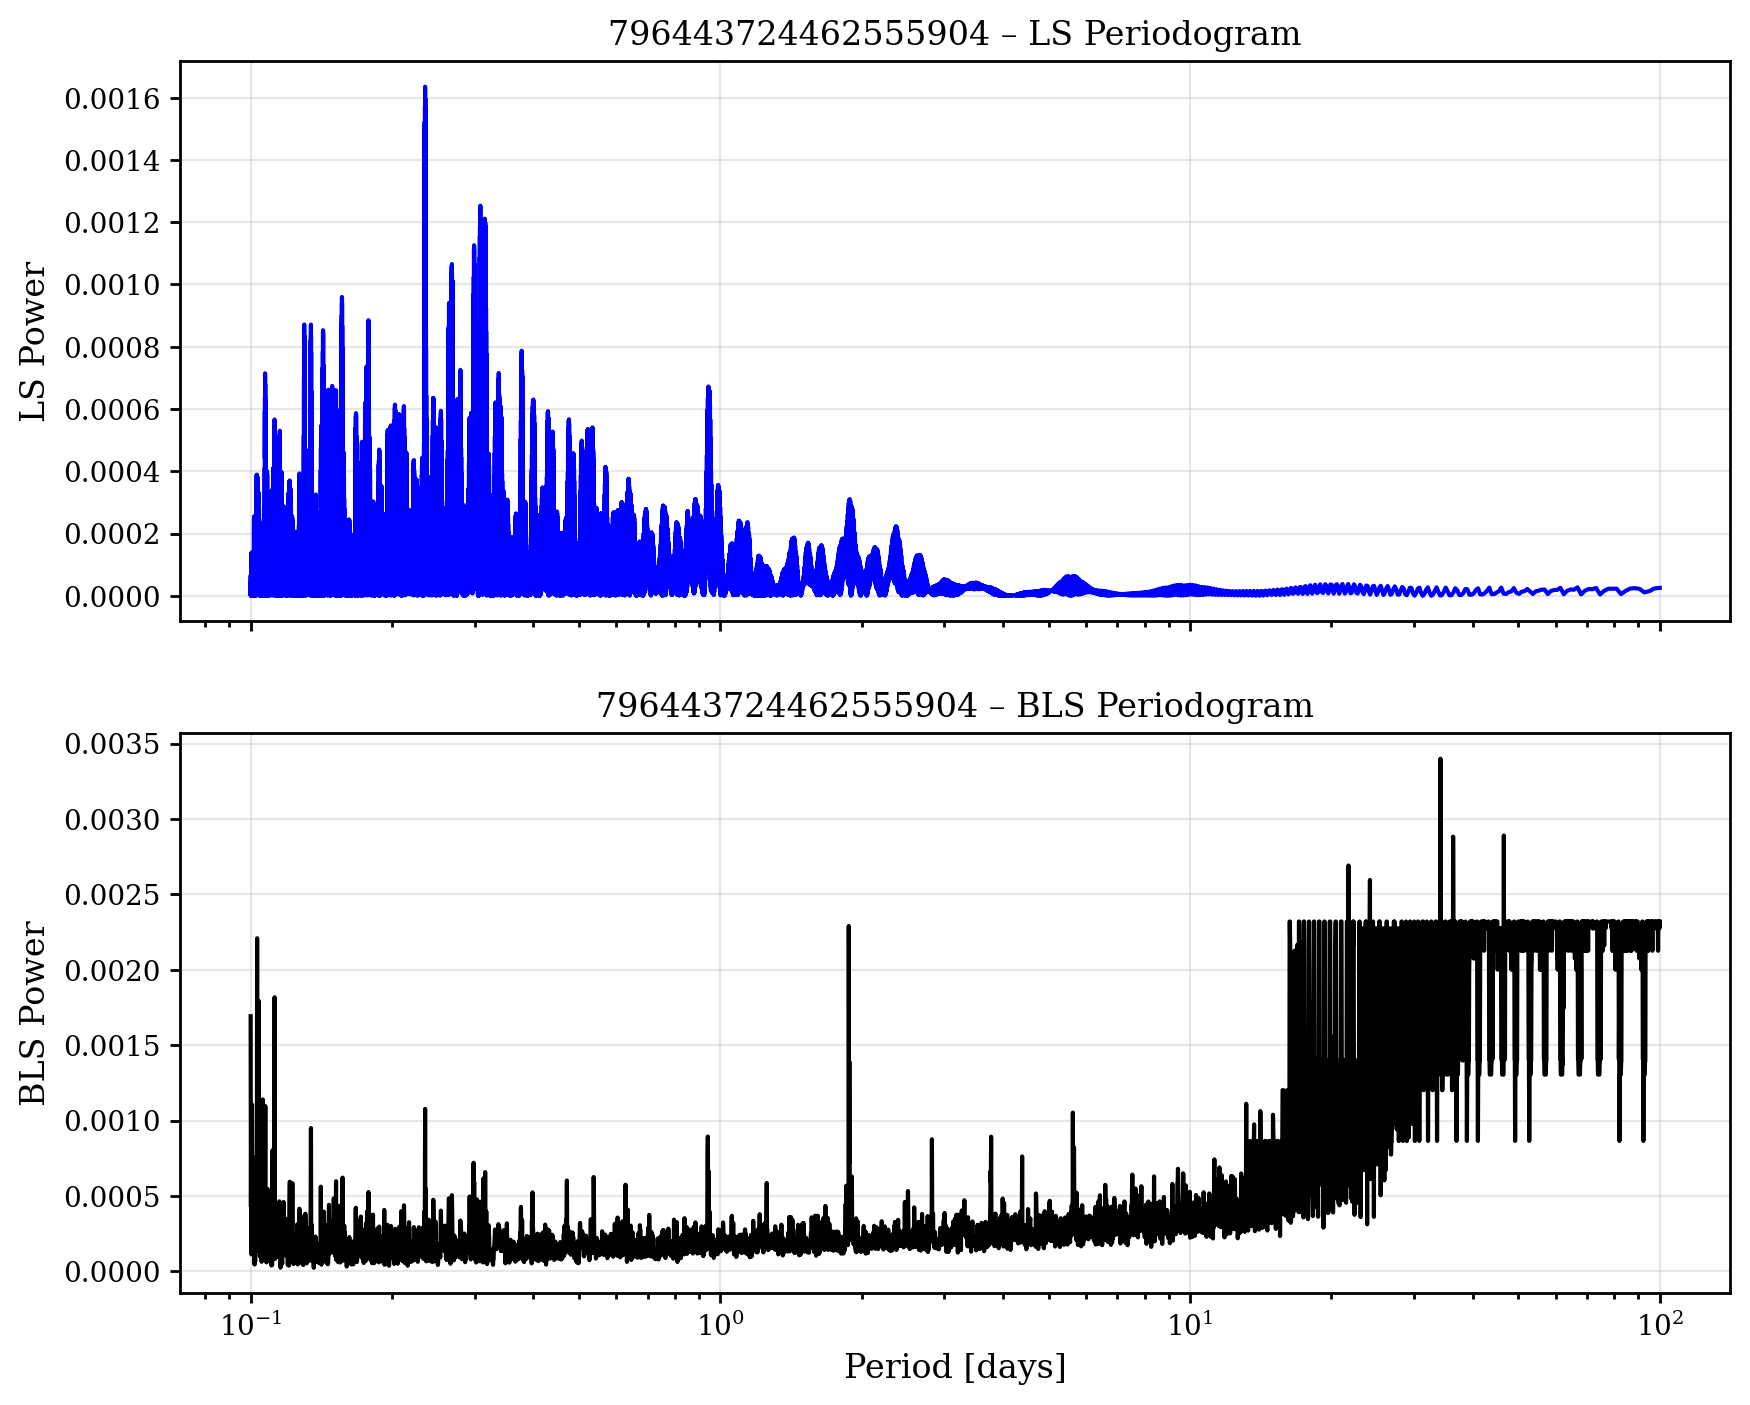

In [118]:
tess_analyzer.batch_plot_periodograms()

2025-11-12 23:41:19,761 - INFO - lnL stats | single: mean=-0.87 max=0.26, binary: mean=-0.59 max=0.18, field: mean=0.00 max=0.00


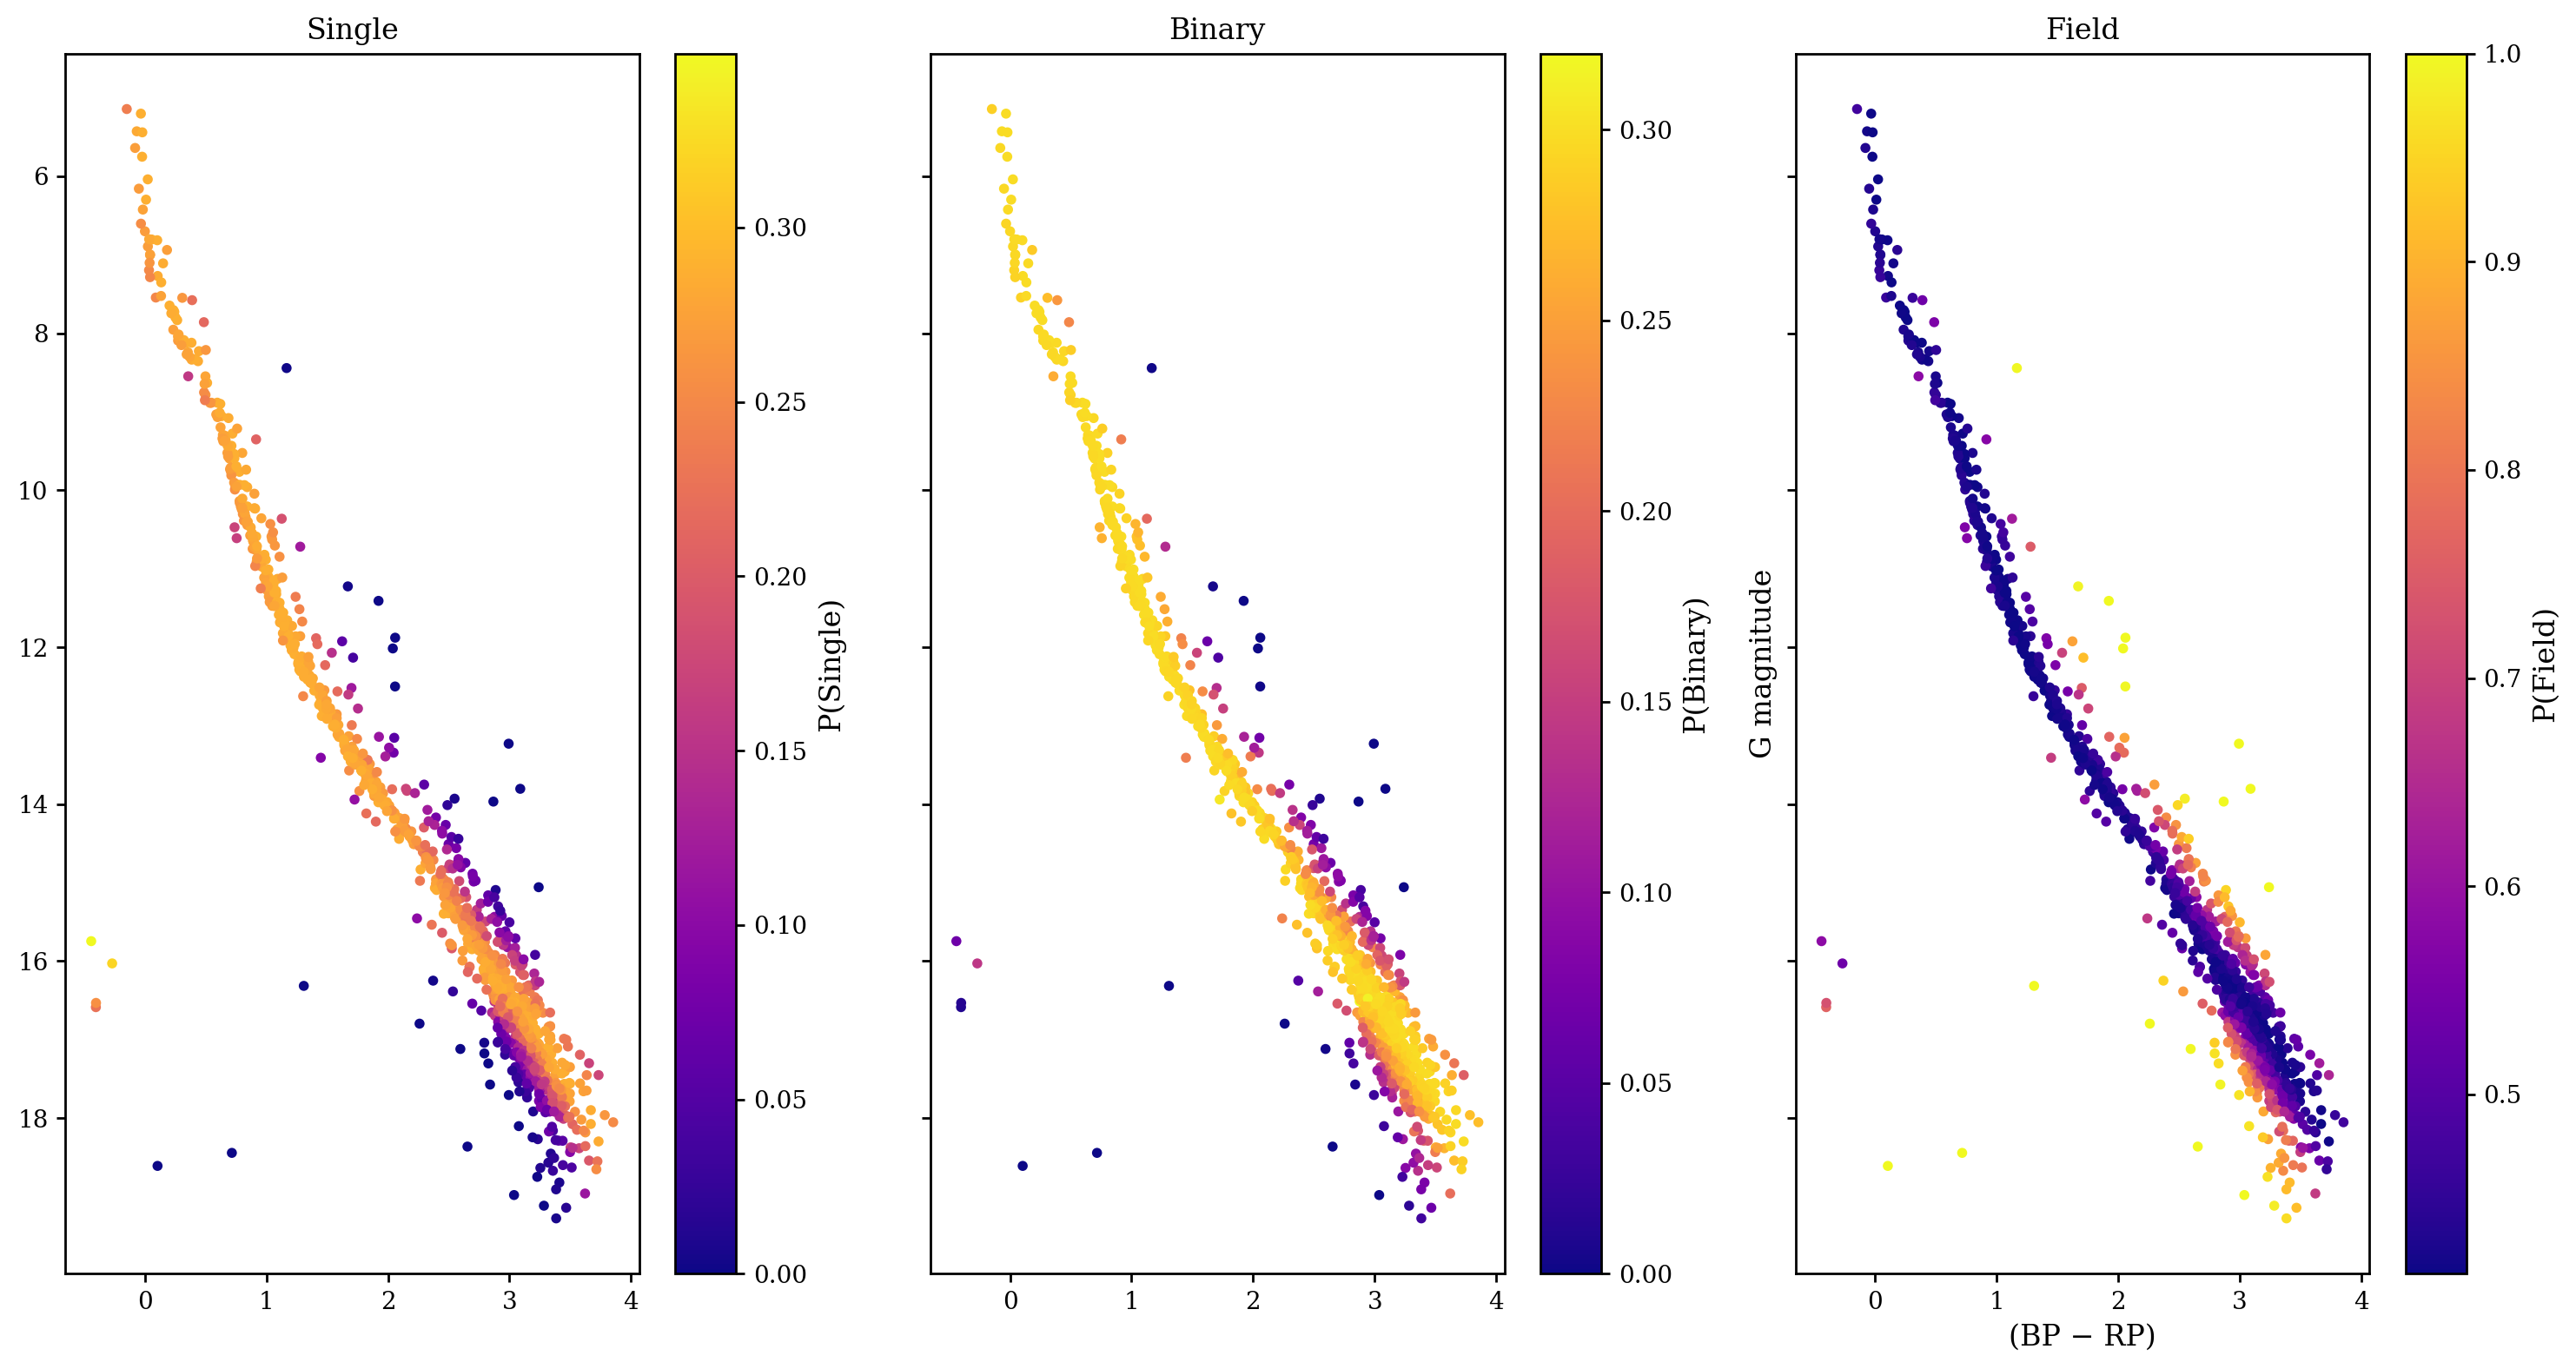

In [111]:
import matplotlib.pyplot as plt

R = binary_fitter.E_step(binary_fitter.theta)
labels = ["Single", "Binary", "Field"]
colors = [R[:,0], R[:,1], R[:,2]]

fig, axes = plt.subplots(1, 3, figsize=(15, 8), sharex=True, sharey=True)
for ax, c, lbl in zip(axes, colors, labels):
    sc = ax.scatter(binary_fitter.BP - binary_fitter.RP, binary_fitter.G,
                    c=c, cmap="plasma", s=10)
    ax.invert_yaxis()
    ax.set_title(lbl)
    plt.colorbar(sc, ax=ax, label=f"P({lbl})")
plt.xlabel("(BP − RP)")
plt.ylabel("G magnitude")
plt.tight_layout()
plt.show()


In [87]:
import generator.synthesizer

In [88]:
from generator import IsochroneSynthesizer

synthesizer = IsochroneSynthesizer()
df = synthesizer.generate(1000)

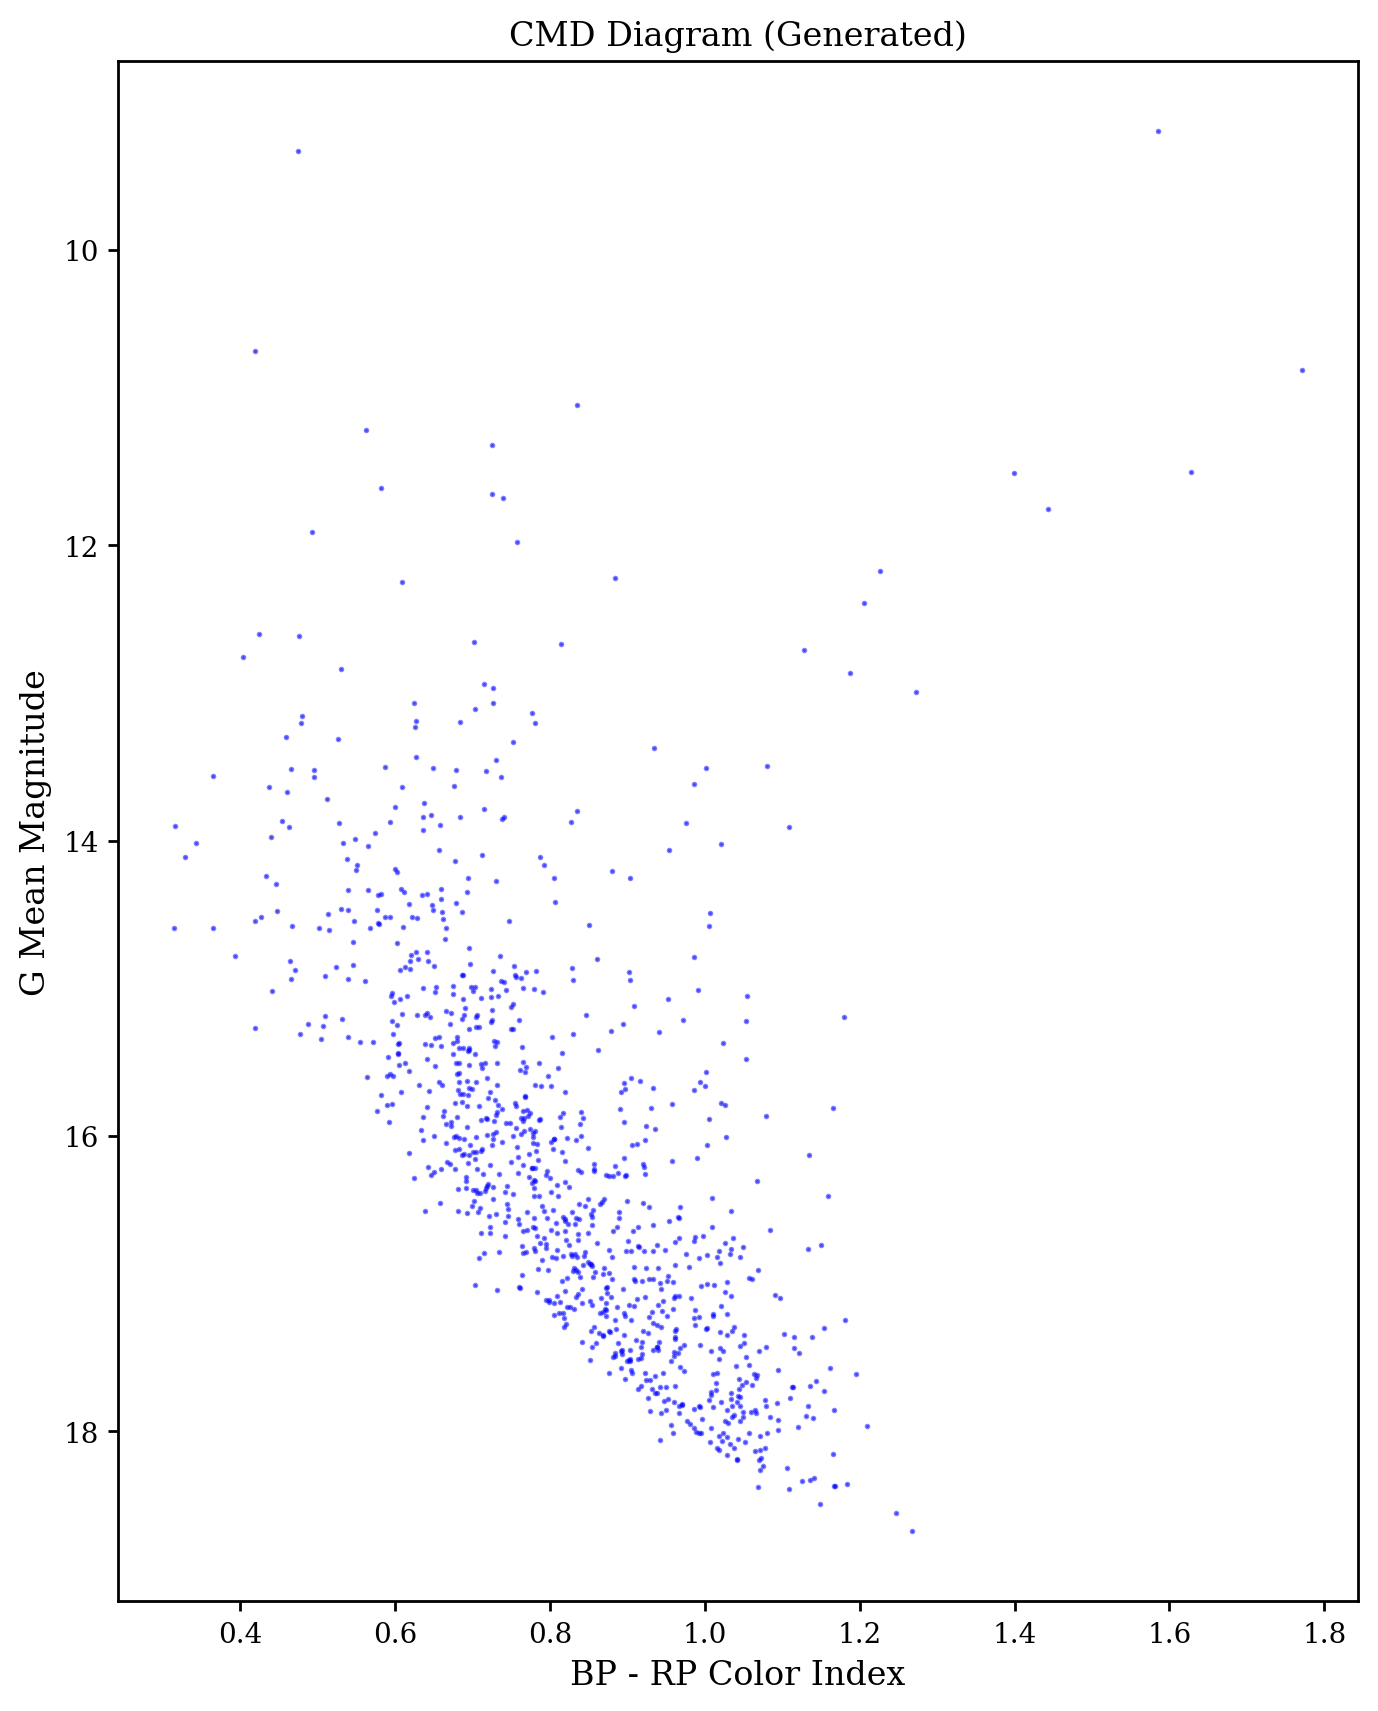

(<Figure size 800x1000 with 1 Axes>,
 <Axes: title={'center': 'CMD Diagram (Generated)'}, xlabel='BP - RP Color Index', ylabel='G Mean Magnitude'>)

In [89]:
synthesizer.plot_hr_diagram()

In [90]:
synthetic_fitter = MISTFitter(data=df)

In [91]:
synthetic_sampler = synthetic_fitter.sample_cluster(n_walkers=32, n_burn=200, n_steps=1000)

100%|██████████| 1000/1000 [03:01<00:00,  5.52it/s]


2025-11-12 23:15:31,992 - WARNING - Too few points to create valid contours
2025-11-12 23:15:32,020 - WARNING - Too few points to create valid contours
2025-11-12 23:15:32,040 - WARNING - Too few points to create valid contours
2025-11-12 23:15:32,059 - WARNING - Too few points to create valid contours
2025-11-12 23:15:32,078 - WARNING - Too few points to create valid contours
2025-11-12 23:15:32,089 - WARNING - Too few points to create valid contours
2025-11-12 23:15:32,107 - WARNING - Too few points to create valid contours
2025-11-12 23:15:32,128 - WARNING - Too few points to create valid contours
2025-11-12 23:15:32,139 - WARNING - Too few points to create valid contours
2025-11-12 23:15:32,150 - WARNING - Too few points to create valid contours


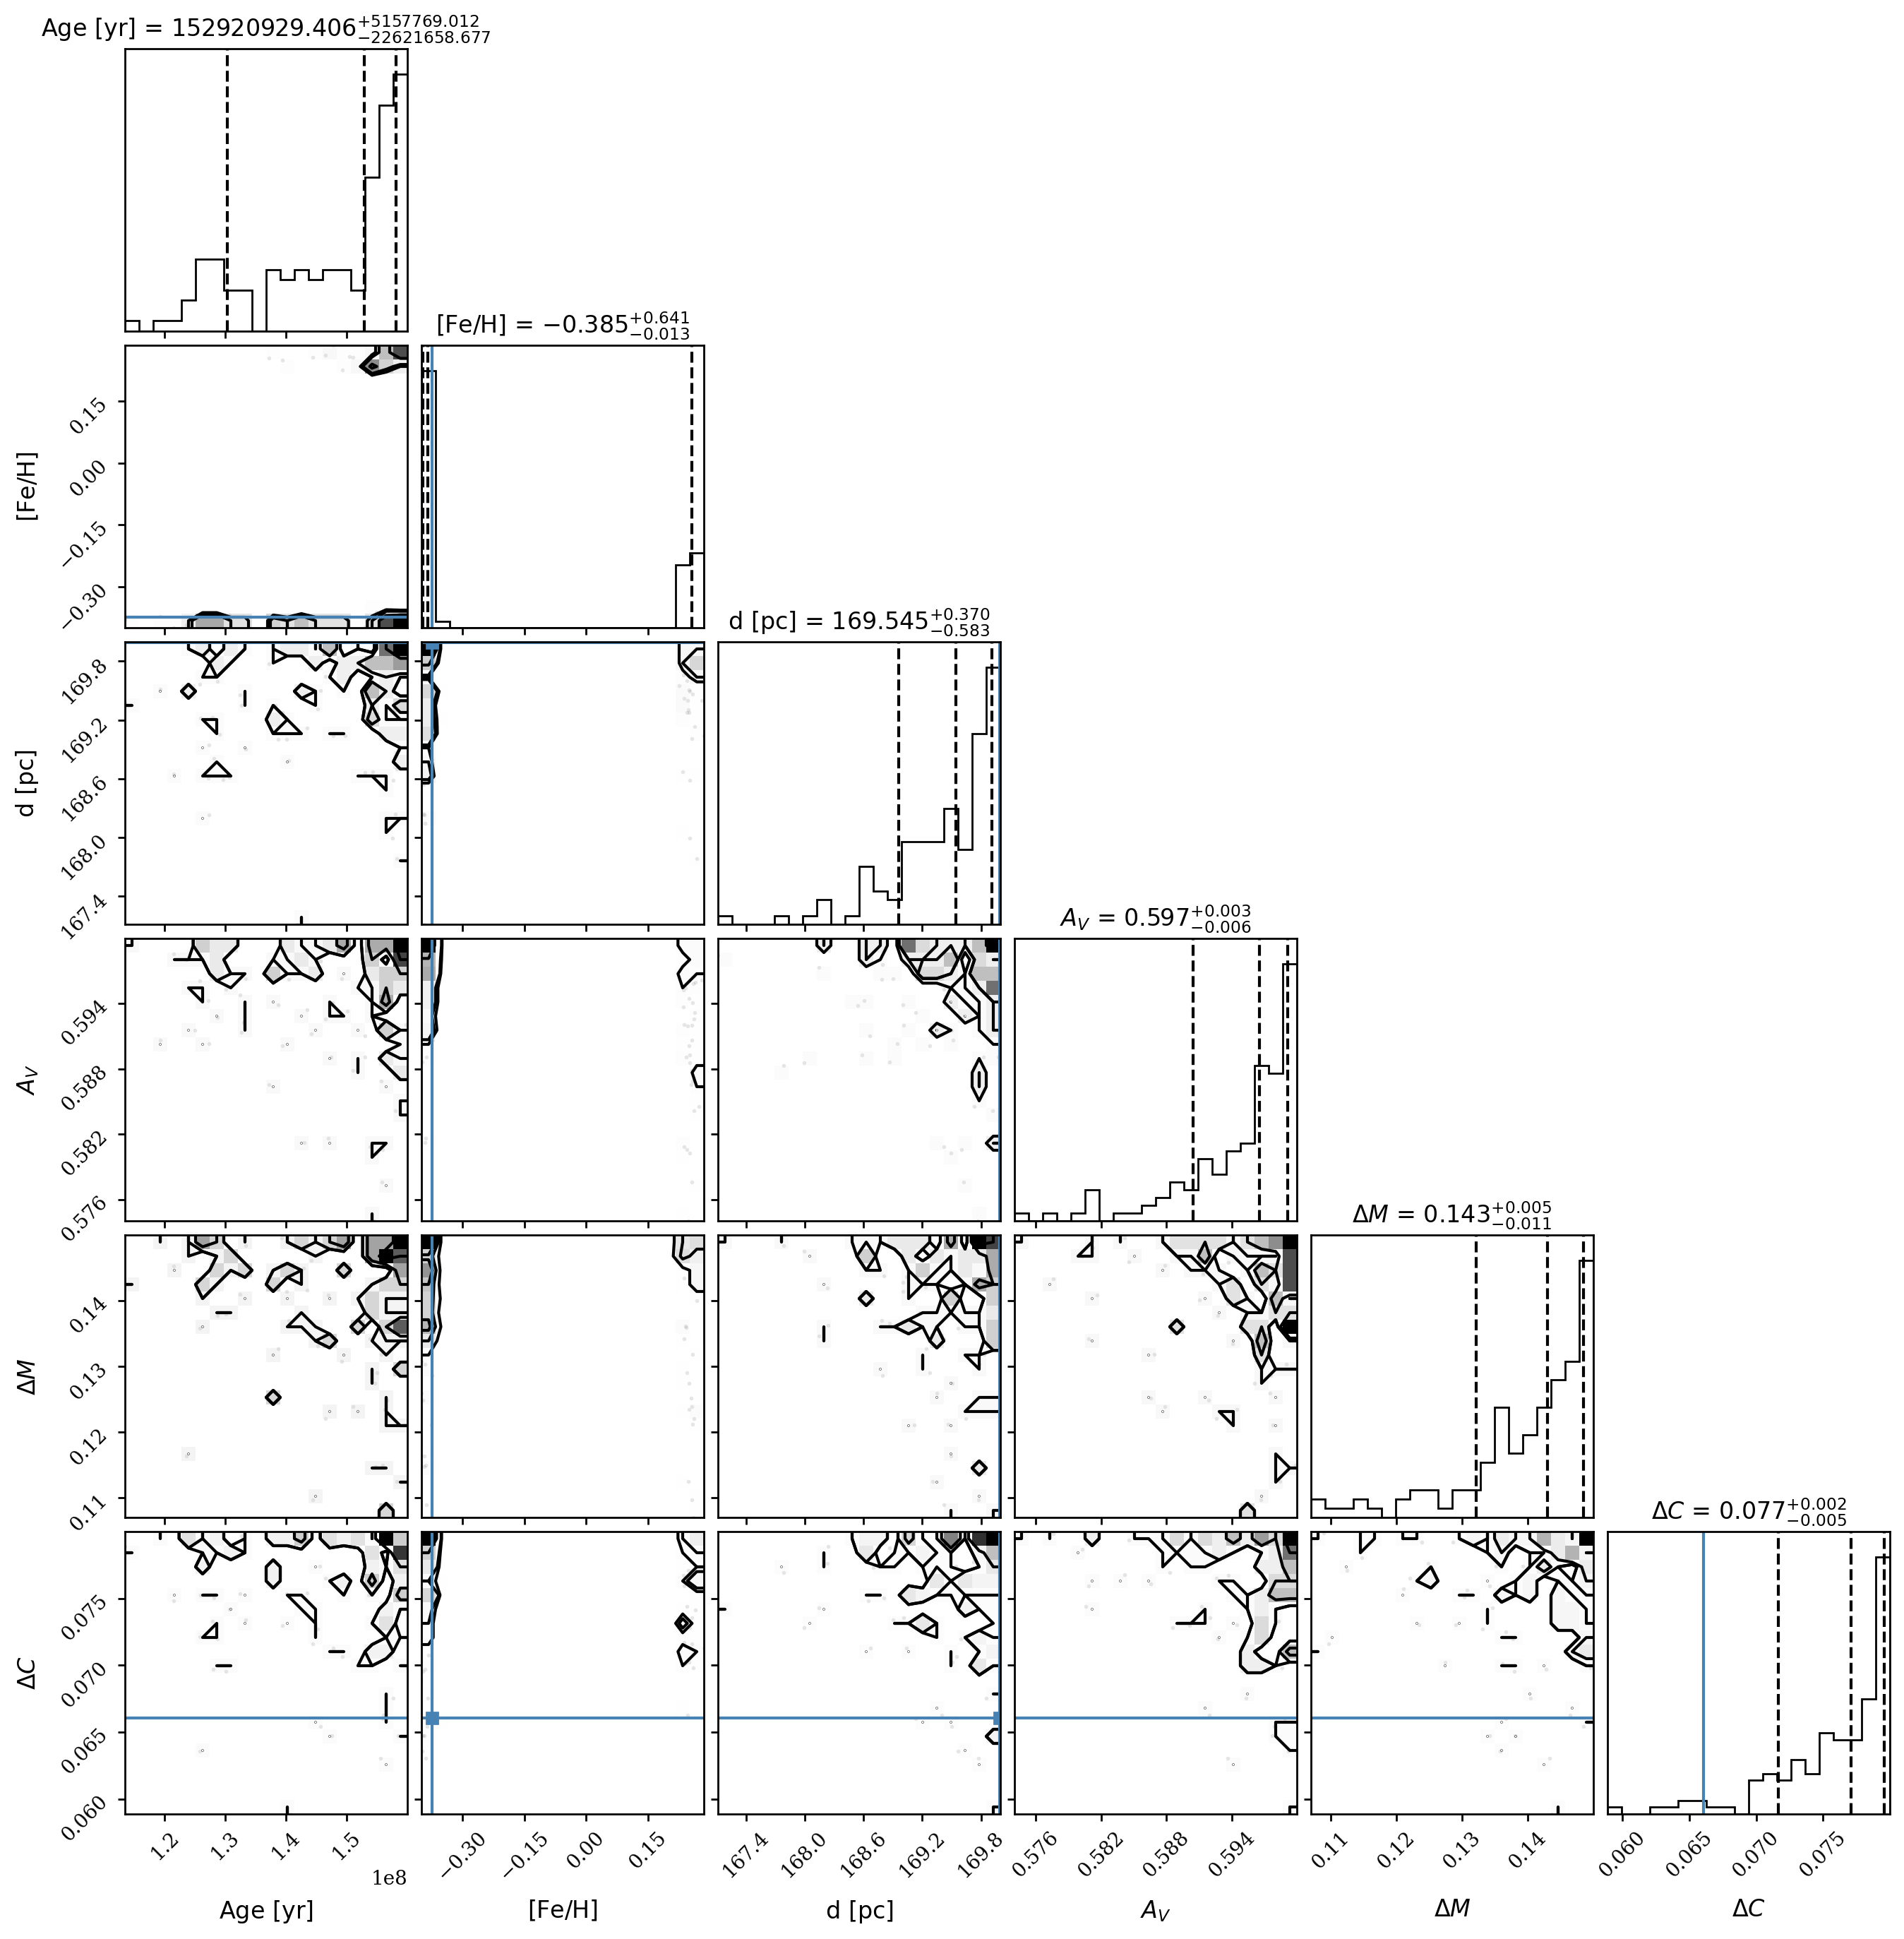

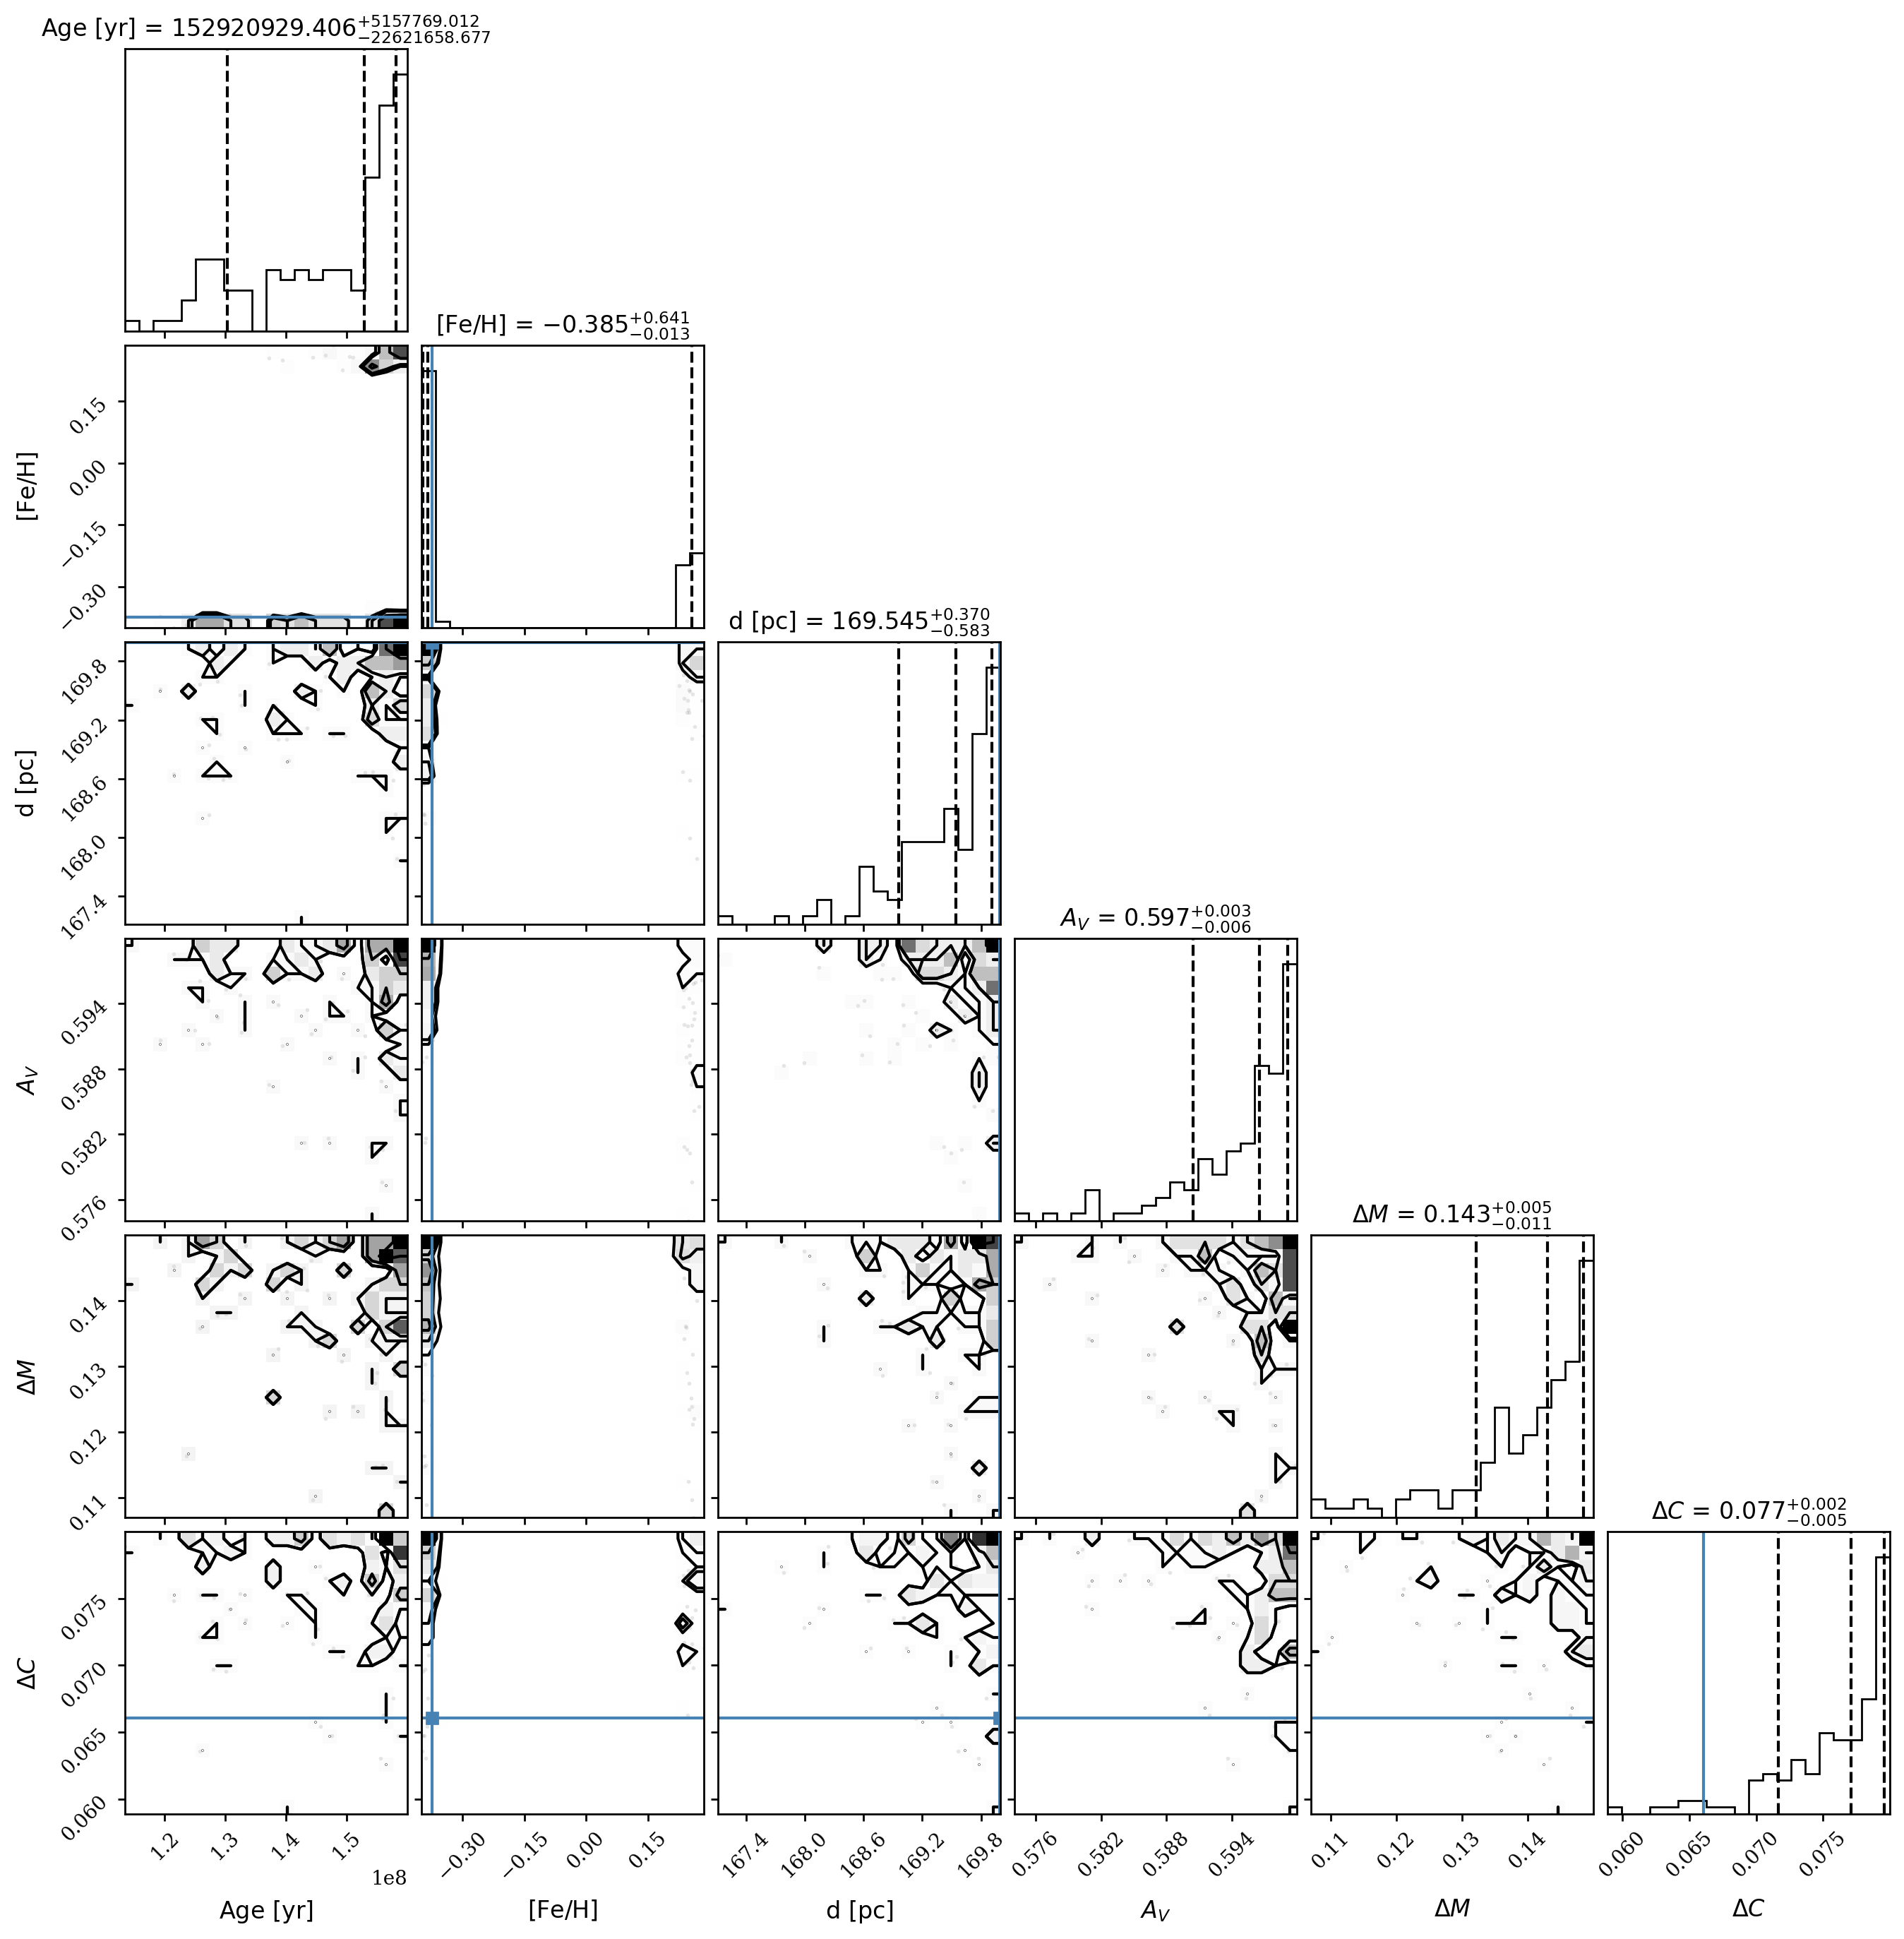

In [92]:
synthetic_fitter.plot_corner(synthetic_sampler, discard=200, thin=200)

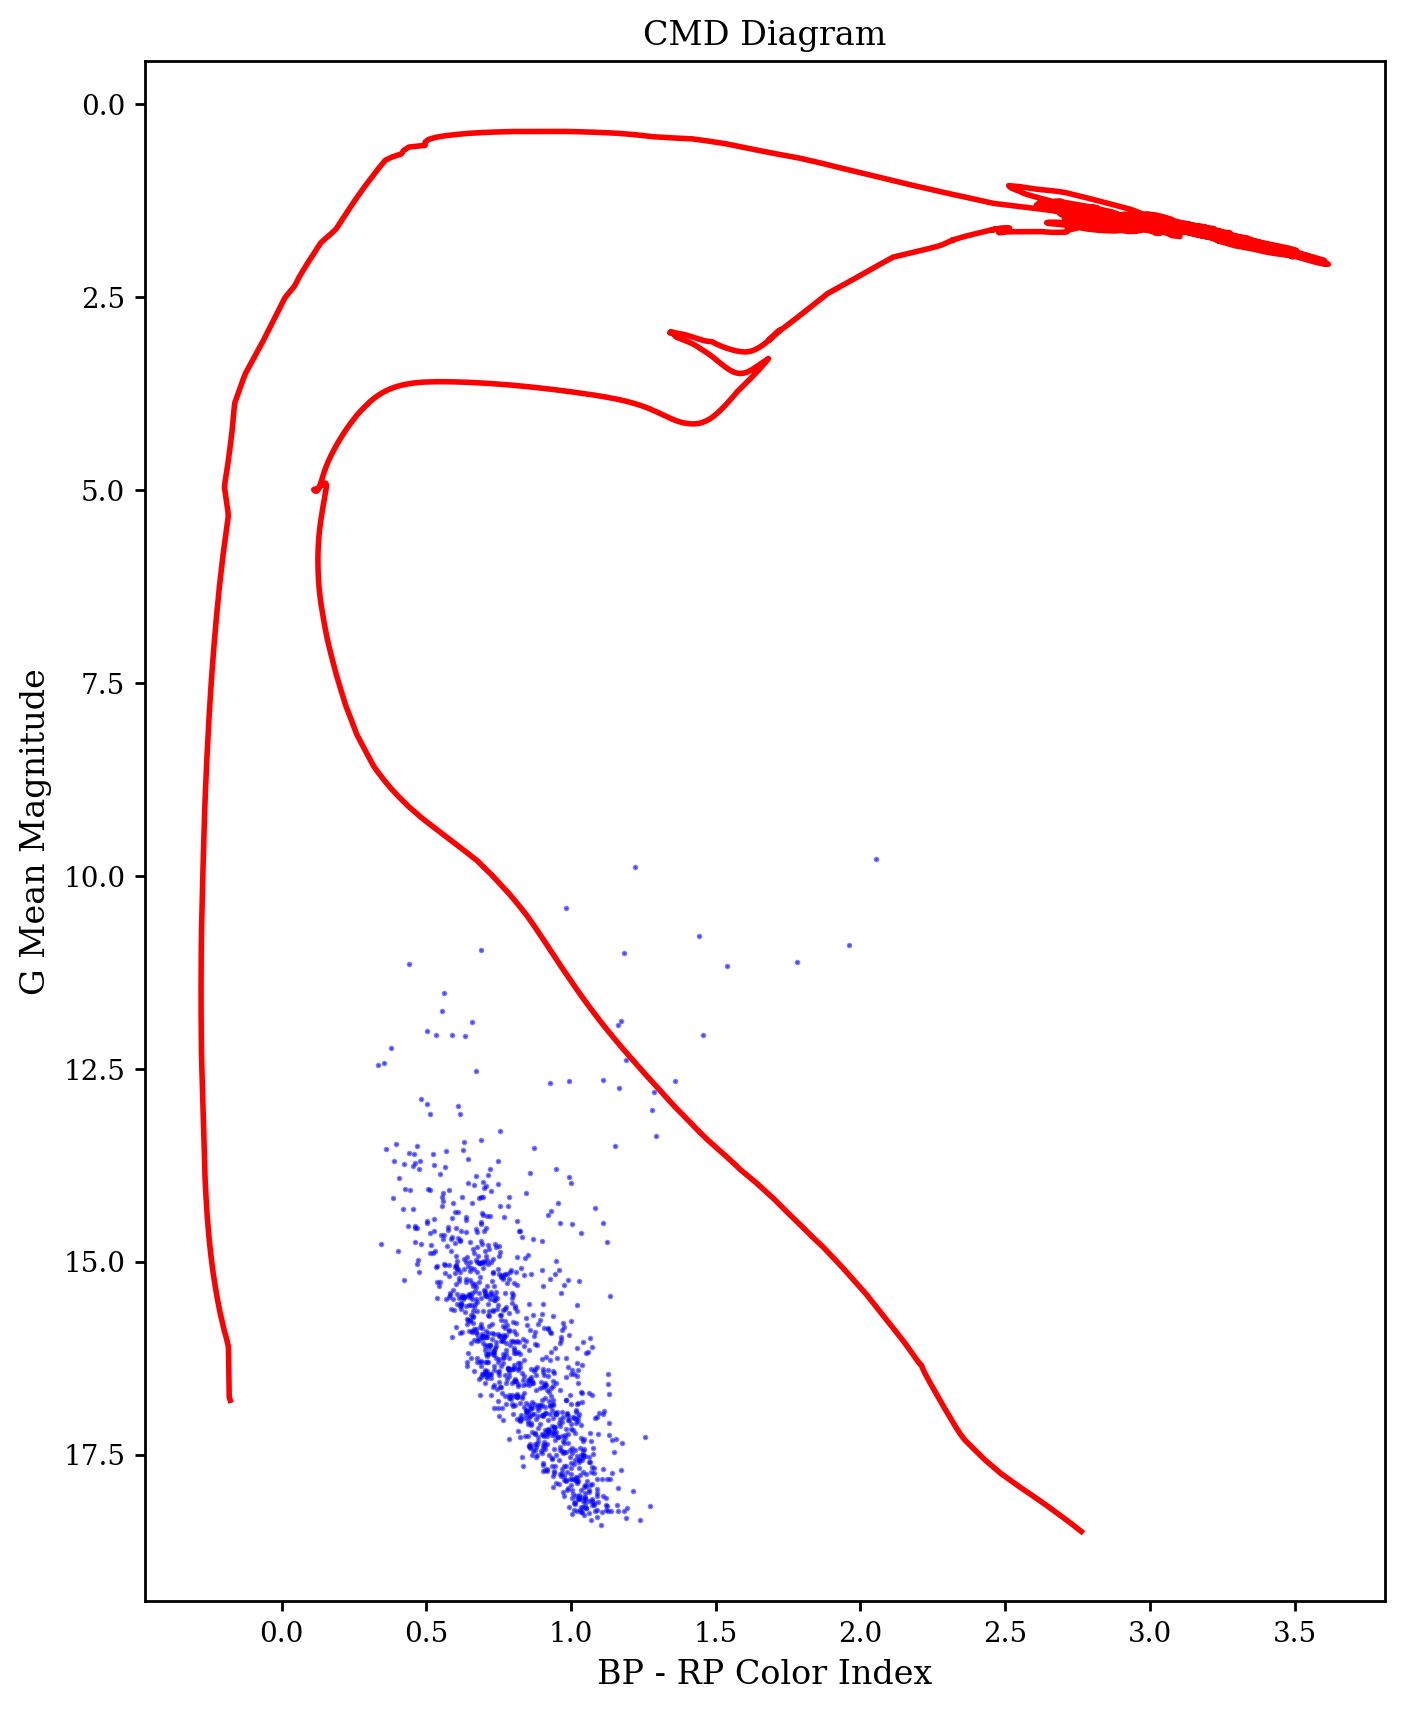

(<Figure size 800x1000 with 1 Axes>,
 <Axes: title={'center': 'CMD Diagram'}, xlabel='BP - RP Color Index', ylabel='G Mean Magnitude'>)

In [93]:
# Step 5: plot best model
best_params = synthetic_fitter.get_best_model()

# Step 4: Plot median
synthetic_fitter.plot_isochrone(best_params)

In [94]:
from analyzer import BinaryMixtureFitter

synthetic_binary_fitter = BinaryMixtureFitter(data=df)
synthetic_binary_fitter.fit(theta=synthetic_fitter.get_best_model())

print(synthetic_binary_fitter.get_mixture_weights())

2025-11-12 23:15:33,245 - INFO - Starting EM fit
2025-11-12 23:15:33,246 - INFO - Initial weights: [0.8 0.2 0. ]
  0%|          | 0/40 [00:00<?, ?it/s]2025-11-12 23:15:35,617 - INFO - lnL stats | single: mean=-10.81 max=21.16, binary: mean=-2.90 max=12.54, field: mean=0.00 max=0.00
2025-11-12 23:15:35,618 - INFO - Updated mixture weights: [4.84487776e-01 5.15015946e-01 4.96277916e-04]
  2%|▎         | 1/40 [00:02<01:32,  2.37s/it]2025-11-12 23:15:35,621 - INFO - lnL stats | single: mean=-10.81 max=21.16, binary: mean=-2.90 max=12.54, field: mean=0.00 max=0.00
2025-11-12 23:15:35,622 - INFO - Updated mixture weights: [0.40138848 0.42432215 0.17428937]
2025-11-12 23:15:35,624 - INFO - lnL stats | single: mean=-10.81 max=21.16, binary: mean=-2.90 max=12.54, field: mean=0.00 max=0.00
2025-11-12 23:15:35,625 - INFO - Updated mixture weights: [0.36812673 0.26389071 0.36798256]
2025-11-12 23:15:35,627 - INFO - lnL stats | single: mean=-10.81 max=21.16, binary: mean=-2.90 max=12.54, field: mea

[0.38059126 0.17913235 0.44027638]


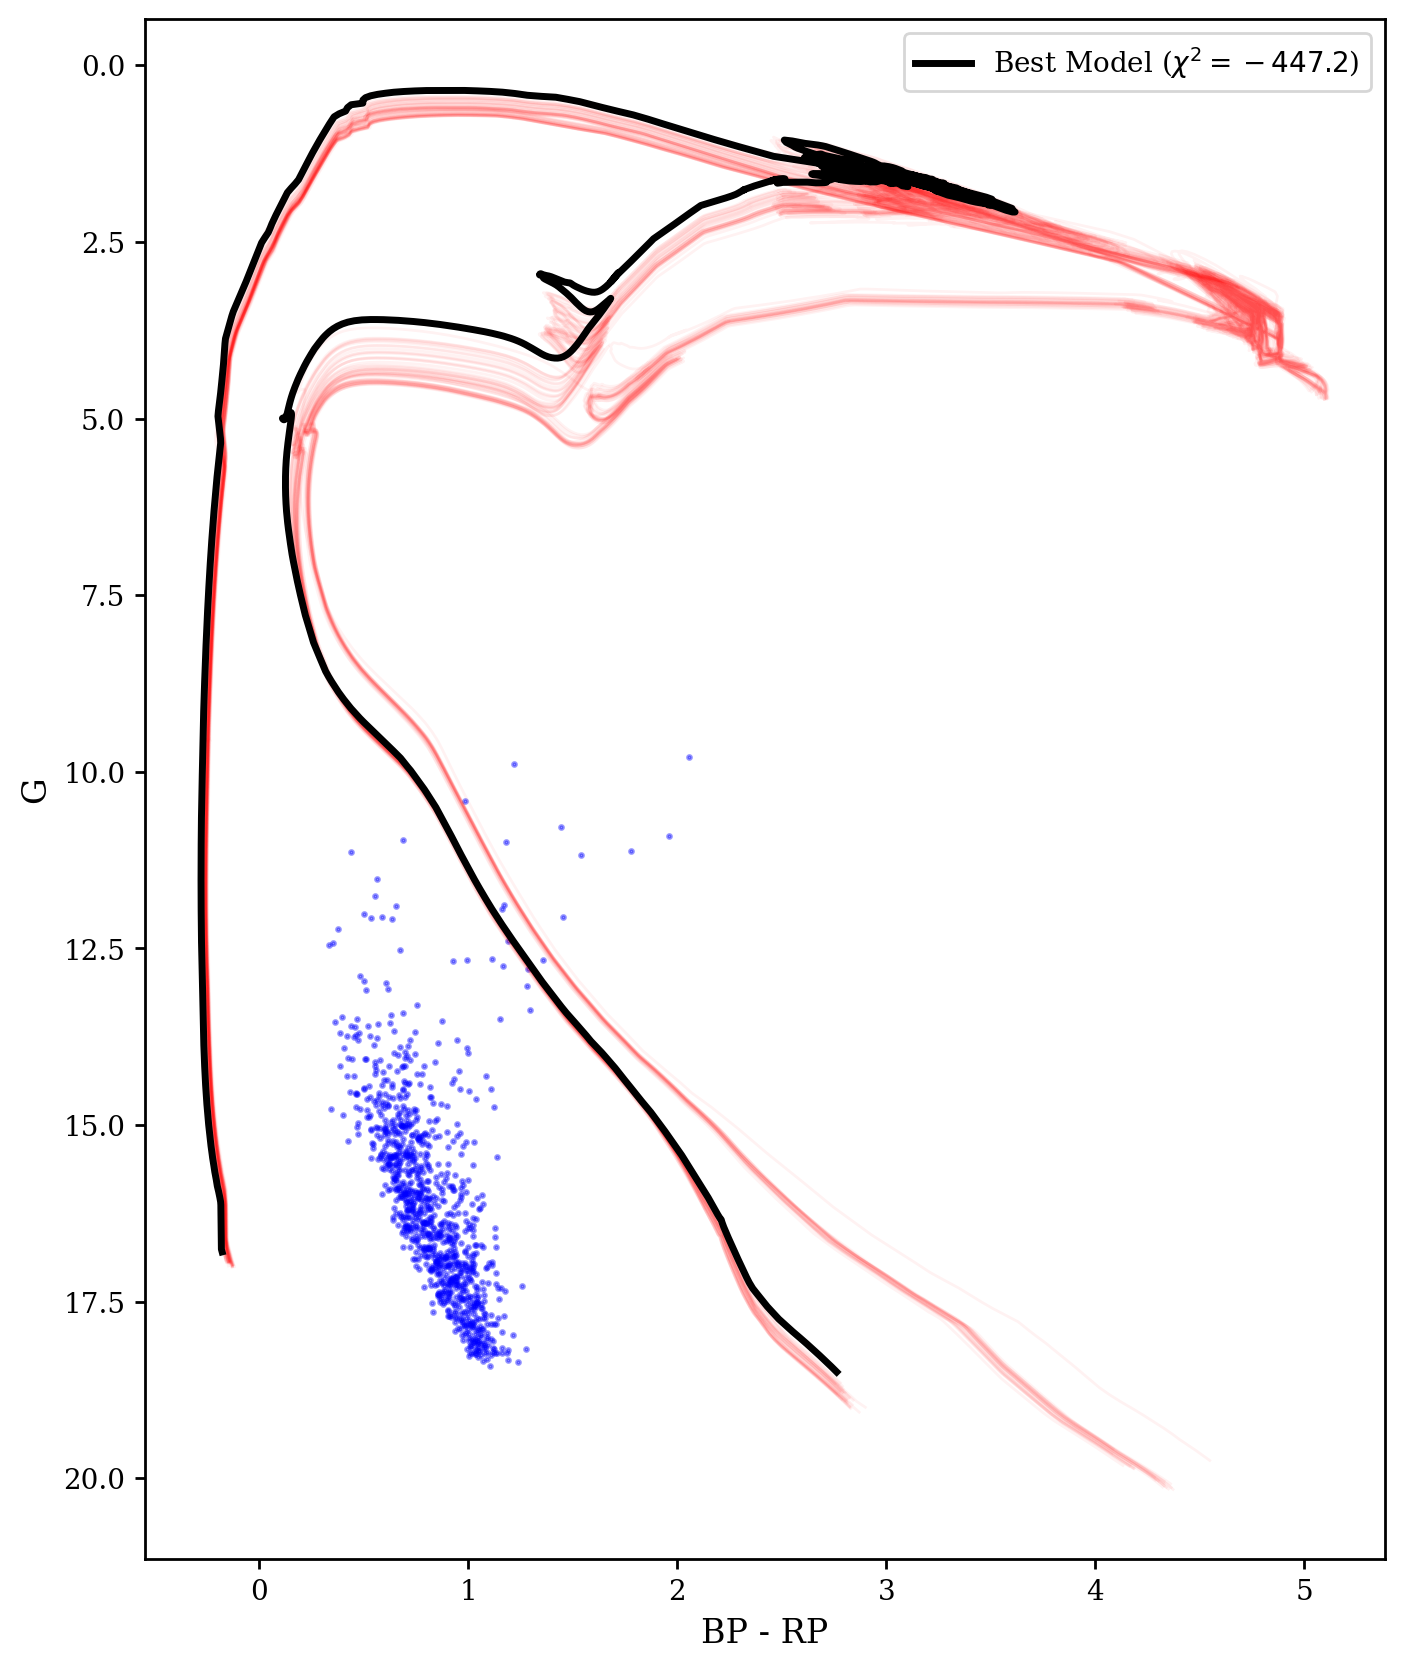

(<Figure size 800x1000 with 1 Axes>, <Axes: xlabel='BP - RP', ylabel='G'>)

In [95]:
synthetic_fitter.plot_good_isochrones(chi2_cutoff=1)

2025-11-12 23:15:36,479 - INFO - lnL stats | single: mean=-10.81 max=21.16, binary: mean=-2.90 max=12.54, field: mean=0.00 max=0.00


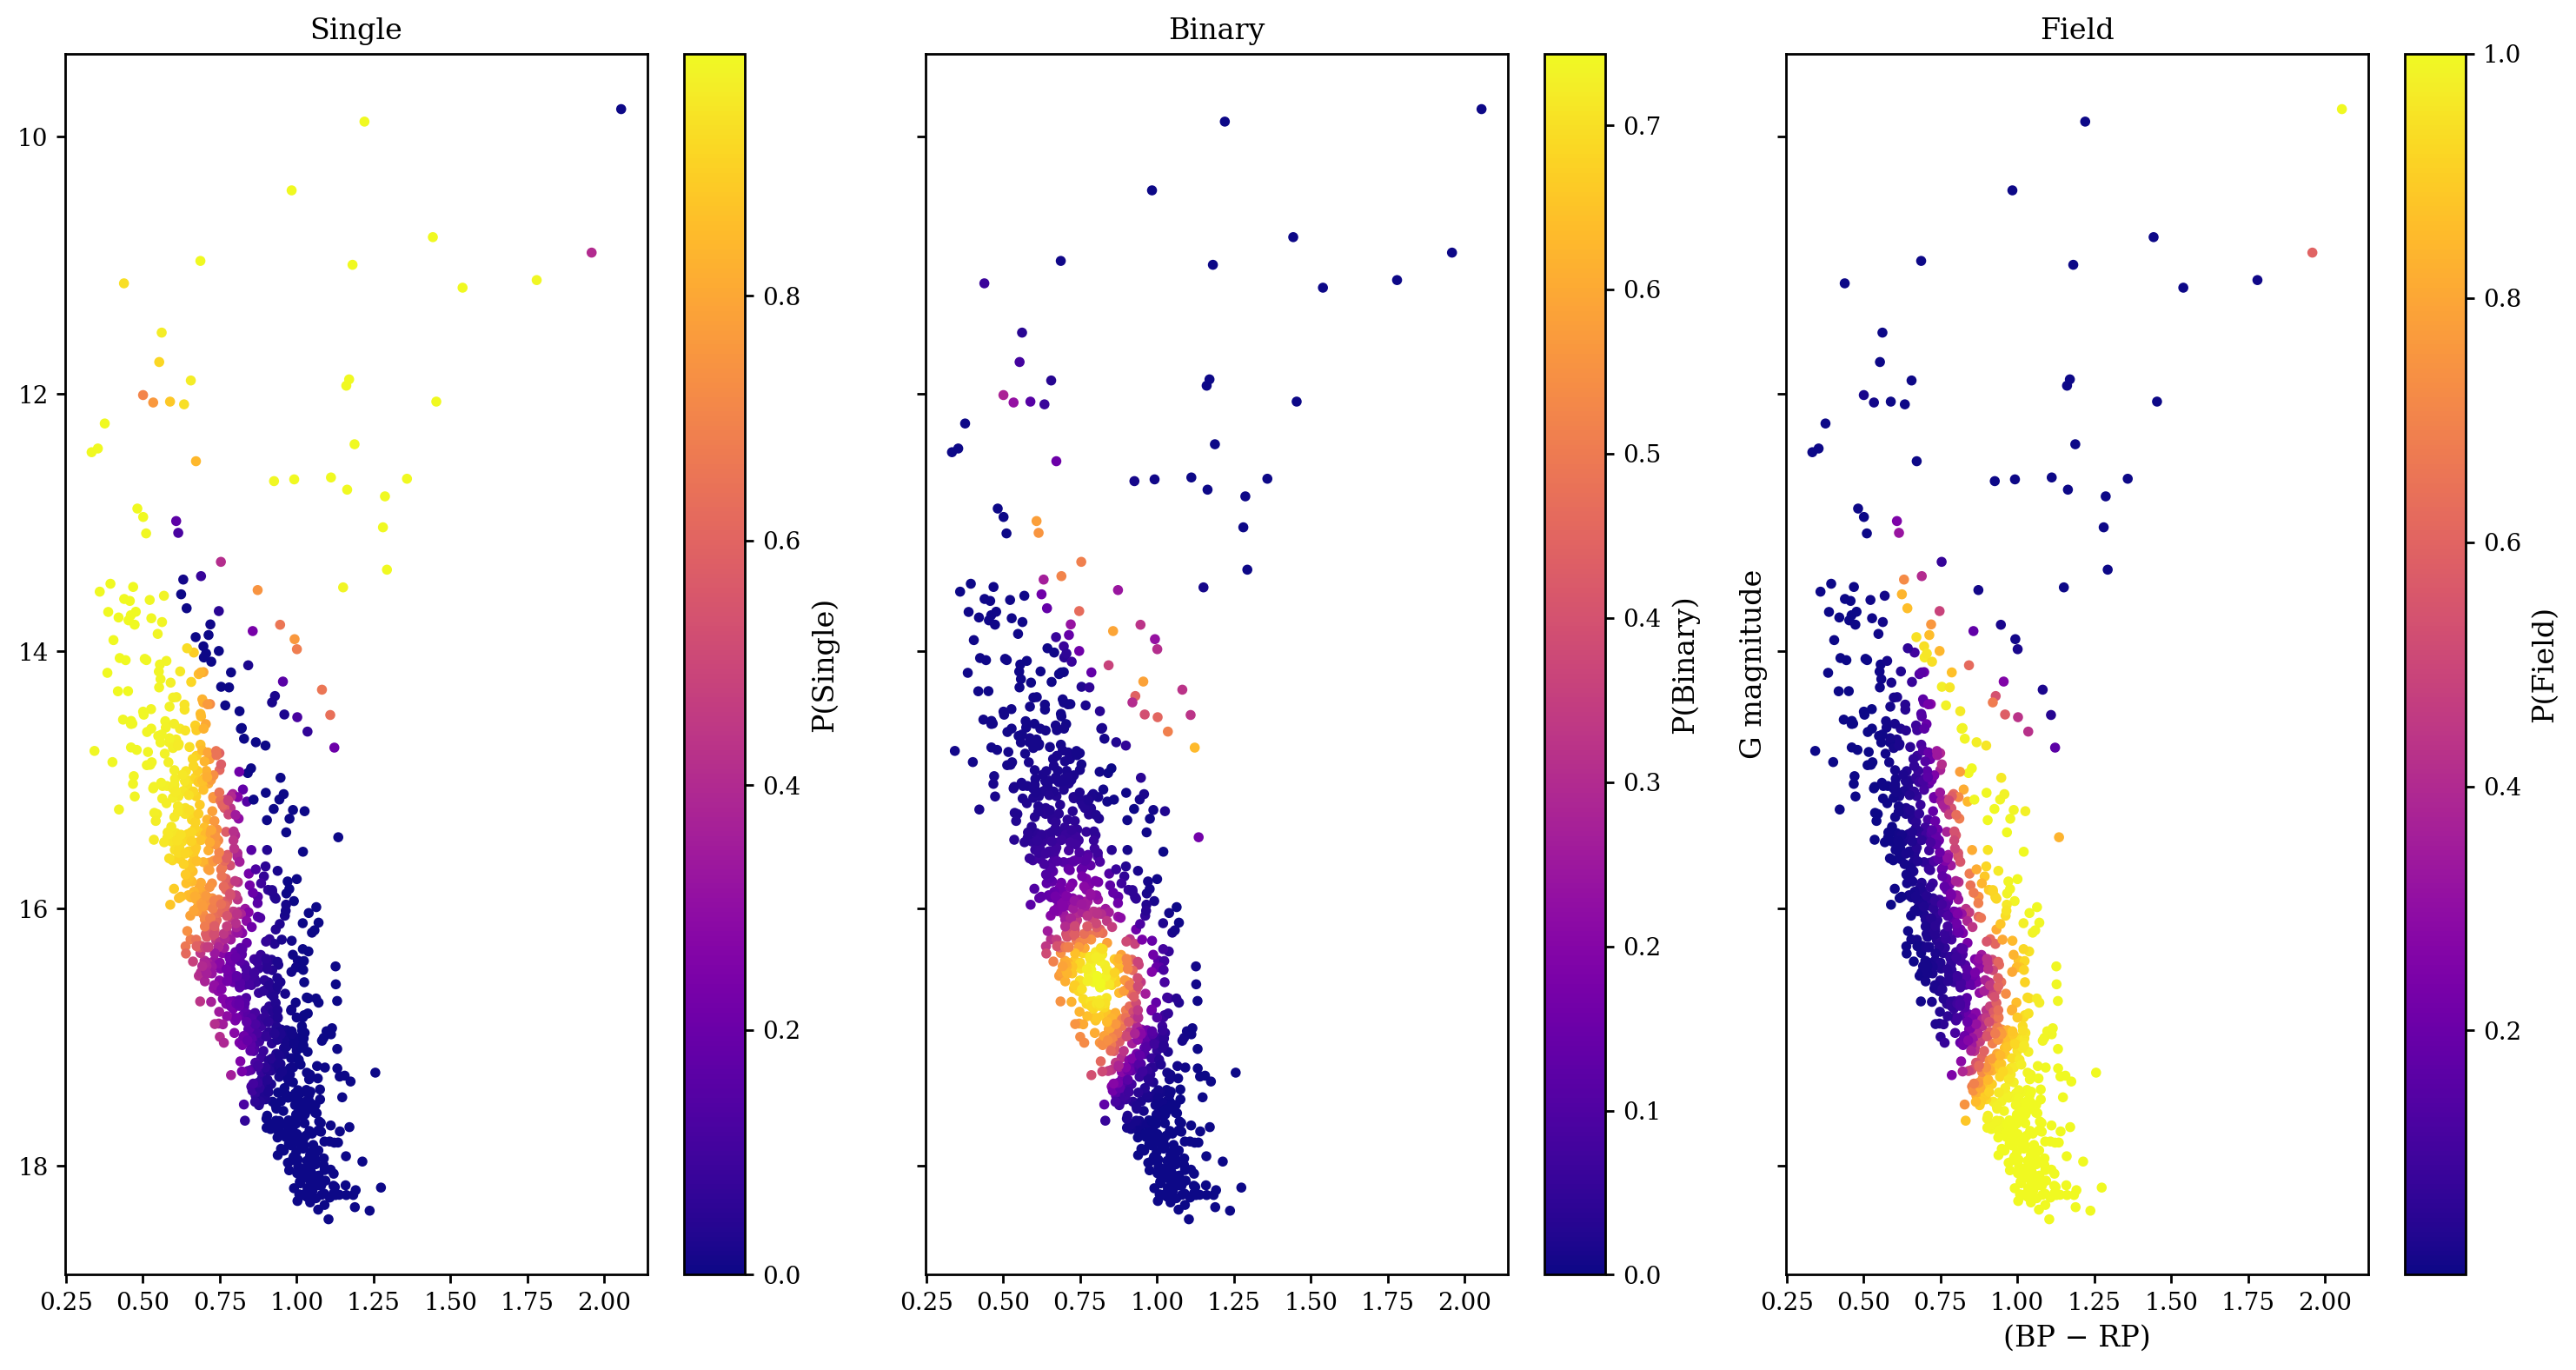

(<Figure size 1500x800 with 6 Axes>,
 <Axes: title={'center': 'Field'}, xlabel='(BP − RP)', ylabel='G magnitude'>)

In [96]:
synthetic_binary_fitter.plot()